<a href="https://colab.research.google.com/github/GiX7000/regression-and-classification-with-statisticall-ML/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression.

We consider a generalized linear regression problem generated by the following model:

$y = f(x) + \eta\ (1)$

where $
f(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \theta_5x^5\ (1a),$

$\eta\$ corresponds to white Gaussian noise and the components of weight vector have the following values:

$\theta_0=0.2, \theta_1=-1, \theta_2=0.9, \theta_3=0.7, \theta_5=-0.2.\ (2)$

We also consider $N$ equidistant points $x_1, x_2, \dots, x(n)$ in the interval $[0,2]$ in order to create samples for our training set:

$y(n) = \theta_0 + \theta_1x_n + \theta_2x_n^2 + \theta_3x_n^3 + \theta_5x_n^5 + \eta_n, \; n = 1, 2, 3, \ldots, N\ (3)$

where $\eta_n$ are noise samples originating from a Gaussian distsribution with mean $0$ and variance $\sigma_\eta^2$.

We also create a test set using $N_1$ points randomly selected on the *x* axis in the interval $[0,2]$.

We  will use several models to train and get estimates for the points *y* of our test set.



In [2]:
# useful libraries
import numpy as np
import matplotlib.pyplot as plt

# parameters
N = 20 # number of training samples
N1 = 20 # number of test samples
noise_variance = 0.05 # variance of noise
noise_mean = 0 # mean of noise
theta_true = np.array([0.2, -1, 0.9, 0.7, -0.2]) # true model's coefficients (5,)
theta_full = np.array([0.2, -1.0, 0.9, 0.7, 0.0, -0.2]) # theta parameter vector, with zero for x^4, (6,)

# f_full(x) for any degree
def f_full(x, coeffs):
  return sum(coeffs[i] * x**i for i in range(len(coeffs)))

# true f(x)
def f_true(x, coeffs):
  return coeffs[0] + coeffs[1] * x + coeffs[2] * x**2 + coeffs[3] * x**3 + coeffs[4] * x**5

# function to create Phi matrices
def create_Phi(x, degree):
  return np.array([x**i for i in range(degree + 1)]).T

# function to perform LS
def least_squares(X, y):
  return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y)) # theta_hat = inv(X.T @ X) @ X.T @ y

## Experiment 1

We generate $N$ = 20 training points with $\sigma_\eta^2$ = 0.05 and we apply Least Squares(LS) method with the coefficient of the 4th power equal to zero(correct model). We test on $N_1 = 20$ samples and plot true vs. estimate curves.



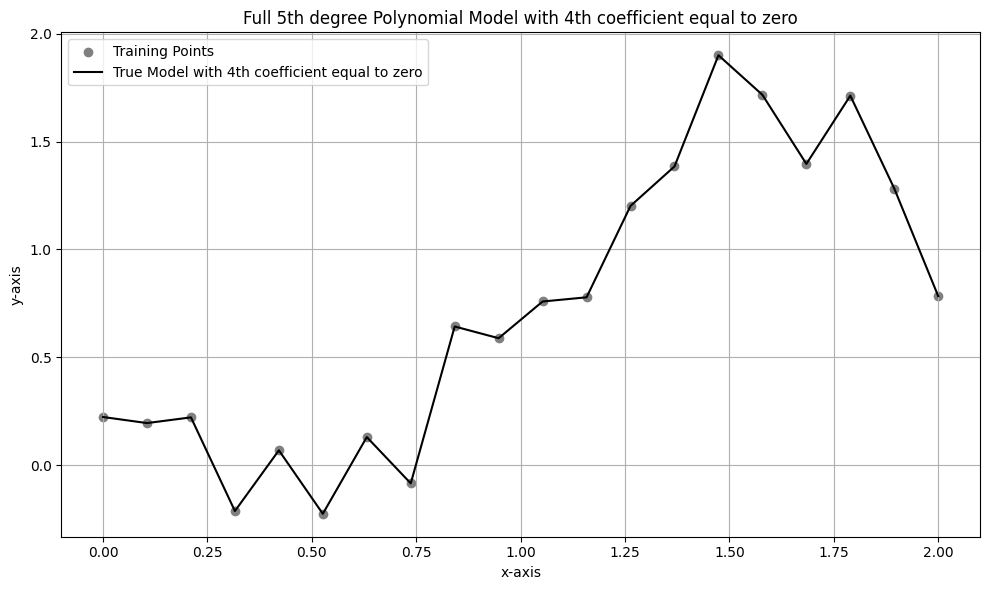

In [ ]:
# generate N training data
x_train = np.linspace(0, 2, N) # N equidistant points in [0,2]
noise = np.random.normal(noise_mean, np.sqrt(noise_variance), N) # generate white gaussian noise samples(independent between each other)
y_train_full = f_full(x_train, theta_full) + noise # using the theta vector with the 4th coefficient equal to zero
y_train_true = f_true(x_train, theta_true) + noise # using the true theta parameter vector

# also plot true vs. correct model lines
plt.figure(figsize=(10,6))
plt.scatter(x_train, y_train_full, color='grey', label='Training Points')
plt.plot(x_train, y_train_full, 'black', label='True Model with 4th coefficient equal to zero')
plt.title('Full 5th degree Polynomial Model with 4th coefficient equal to zero')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Having created the training set, we will use LS method to find optimal $\hat{\theta}$. It is given that $\hat{\theta} = (\Phi^T \Phi)^{-1} \Phi^T y$ (assuming $\Phi^T \Phi$ is invertible), where $\Phi$ is:

  $\Phi = \begin{bmatrix}
  1 & x_1 & x_1^2 & x_1^3 & x_1^4 & x_1^5 \\
  1 & x_2 & x_2^2 & x_2^3 & x_2^4 & x_2^5 \\
  1 & x_3 & x_3^2 & x_3^3 & x_3^4 & x_3^5 \\
  \vdots & \vdots & \vdots & \vdots & \vdots \\
  1 & x_N & x_N^2 & x_N^3 & x_N^4 & x_N^5
  \end{bmatrix}$,

  for the full 5th degree polynomial model. First column correspons to $\theta_0$. We start the business by calculating $\Phi$ matrix for the full true model and estimating $\hat{\theta}$ parameter vector.

In [ ]:
# construct Phi matrix
Phi = create_Phi(x_train, 5) # (20, 6)

# calculate LS estimates for theta
theta_hat = least_squares(Phi, y_train_full)
print('Estimated theta: ', theta_hat)

Estimated theta:  [ 0.26796441 -0.94853374 -1.01130413  4.37163462 -2.30790265  0.26355568]


Having found $\hat{\theta}$ parameter vector, we generate some new data to test our findings and we also plot the results.

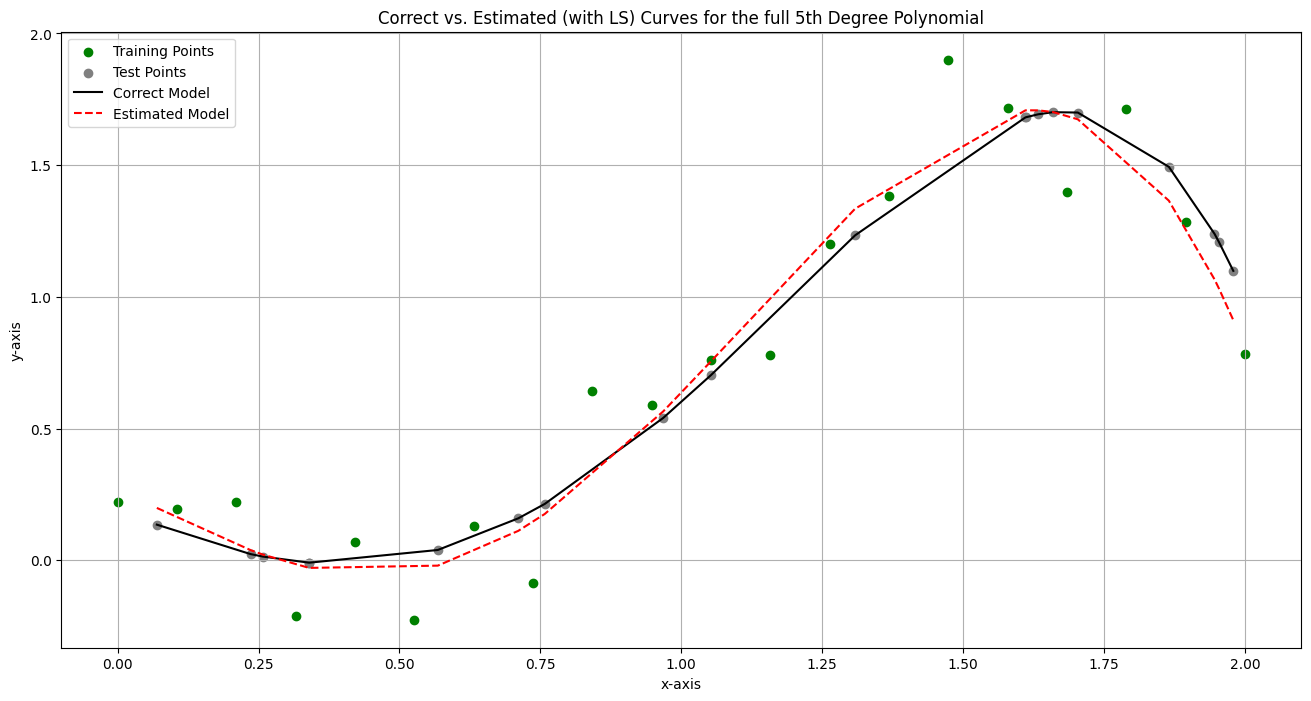

In [ ]:
# generate N1 test data
x_test = np.sort(np.random.uniform(0, 2, N1)) # sort in ascending order generated no equidistance points
y_test = f_true(x_test, theta_true) # (y_train_full=y_train_true because 4th term is 0), evaluate on noise free samples(smoother lines, better real accuracy)

# construct X_test for predictions
phi_test = create_Phi(x_test, 5) # use of 5th degree polynomial model's structure

# y estimates using optimal theta on test set
y_test_pred = phi_test @ theta_hat

# plot true vs. estimated curve
plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train_full, color='green', label='Training Points') # training points
plt.scatter(x_test, y_test, color='grey', label='Test Points') # test points
plt.plot(x_test, y_test, color='black', label='Correct Model') # true model's curve
plt.plot(x_test, y_test_pred, 'r--', label='Estimated Model') # predicted model's curve
plt.title('Correct vs. Estimated (with LS) Curves for the full 5th Degree Polynomial')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The graph shows a comparison between the curve of the full 5th degree model(solid black line) and the estimated one(dashed red line). We observe that the predicted line closely follows the true curve of the test points, suggesting a quite pretty good fit and showing the effectiveness of the LS method. However, deviations begin to appear in the upper right part of the figure, where the estimated model fails to capture the true model's descending trend.

## Experiment 2

In this experiment, we generate $N = 20$ training points with $\sigma_\eta^2 = 0.05$ and we apply LS method, but for a 2nd and a 10th degree polynomial structure models. We perform 100 experiments using distinct noise samples in the training set for each experiment and we calculate the mean and variance of the prediction *y* over all experiments. We plot them along with the curve obtained by the true model this time and compare according to the bias-variance trade-off.

In [ ]:
# new parameters
num_experiments = 100 # number of experiments

# storage lists for the predictions in both cases
preds_2nd = []
preds_10th = []

# create Phis for the 2nd and 10th degree polynomials, using the same x equidistant points in [0,2] as above
Phi_2nd = create_Phi(x_train, 2) # Phi of 2nd degree model
Phi_10th = create_Phi(x_train, 10) # Phi of 10th degree model

# check the shapes of the matrices
print('Phi_2nd shape: ', Phi_2nd.shape, 'Phi_10th shape: ', Phi_10th.shape)

Phi_2nd shape:  (20, 3) Phi_10th shape:  (20, 11)


In [ ]:
# perform the experiment 100 times
for num_exp in range(num_experiments):
  # generate training data
  y_train_2 = f_true(x_train, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # use of the true model

  # calculate theta estimates with LS method for 2nd and 10th degree polynomials
  theta_hat_2 = least_squares(Phi_2nd, y_train_2)
  theta_hat_10 = least_squares(Phi_10th, y_train_2)

  # predictions for 2nd and 10th degree polynomials on the train set
  y_pred_2 = Phi_2nd @ theta_hat_2
  y_pred_10 = Phi_10th @ theta_hat_10

  # store the predictions
  preds_2nd.append(y_pred_2)
  preds_10th.append(y_pred_10)

# calculate mean and variance of predictions for the 2 polynomials over all iterations
pred__mean_2nd_degree = np.mean(preds_2nd, axis = 0) # take the means along x-axis(~mean of each test point over 100 iters)
pred__var_2nd_degree = np.var(preds_2nd, axis = 0)
pred__mean_10th_degree = np.mean(preds_10th, axis = 0)
pred__var_10th_degree = np.var(preds_10th, axis = 0)

# check the shapes
print('preds_2nd_degree shape: ', np.array(preds_2nd).shape, 'preds_10th_degree shape: ', np.array(preds_10th).shape)
print(f'predicted mean 2nd degree: {pred__mean_2nd_degree.shape}, predicted variance 2nd degree: {pred__var_2nd_degree.shape}')
print(f'predicted mean 10th degree: {pred__mean_10th_degree.shape}, predicted variance 10th degree: {pred__var_10th_degree.shape}')

preds_2nd_degree shape:  (100, 20) preds_10th_degree shape:  (100, 20)
predicted mean 2nd degree: (20,), predicted variance 2nd degree: (20,)
predicted mean 10th degree: (20,), predicted variance 10th degree: (20,)


We create some plots now to understandthe the two cases: underfitting and overfitting.

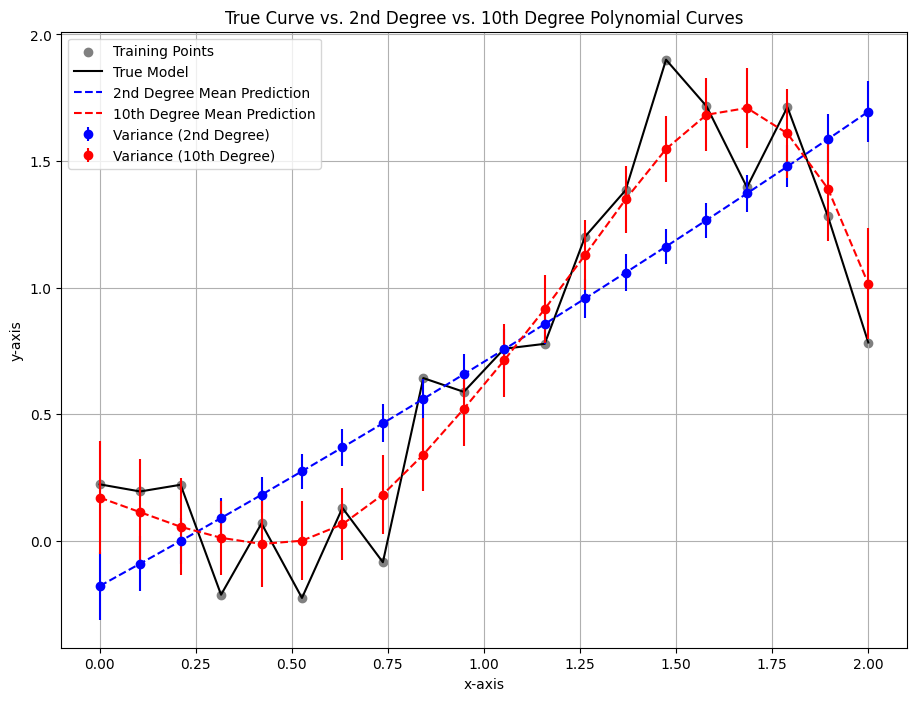

In [ ]:
# plot true vs. prediicted curves on the training set
plt.figure(figsize=(24, 8))

# curve of the true(given) model
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train_true, color='grey', label='Training Points')
plt.plot(x_train, y_train_true, 'black', label="True Model")

# 2nd degree polynomial
plt.plot(x_train, pred__mean_2nd_degree, 'b--', label="2nd Degree Mean Prediction")
plt.errorbar(x_train, pred__mean_2nd_degree, yerr=np.sqrt(pred__var_2nd_degree), fmt='o', color='blue', label="Variance (2nd Degree)")

# 10th degree polynomial
plt.plot(x_train, pred__mean_10th_degree, 'r--', label="10th Degree Mean Prediction")
plt.errorbar(x_train, pred__mean_10th_degree, yerr=np.sqrt(pred__var_10th_degree), fmt='o', color='red', label="Variance (10th Degree)")

plt.title("True Curve vs. 2nd Degree vs. 10th Degree Polynomial Curves")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)
plt.show()

The black line represents the true 5th degree polynomial that lies at our training set from the first experiment. We use this as a baseline in order to get a sense of how a lower and a higher degree polynomials perform in approximating the true model. The 2nd-degree polynomial(blue dashed line) demonstrates underfitting(under-modeling), capturing only a simple trend and completely ignoring the complexity of the true model. This model results in high bias and low variance, as indicated by smaller blue error bars. In contrast, the 10th-degree polynomial(red dashed line) closely matches the training data, capturing almost all the details but overfitting. This leads to low bias but high variance, as shown by larger red error bars. Let's clarify and see in better plots this trade-off between bias and variance when using models of different degree of polynomials.



A way to measure how good or bad the performance of our model is its mean squared deviation(distance) from the optimal one($\mathbb{E}[y \mid x]
$). Its mean is taken with respect to all possible predictions in the produced training sets, $100$ in our case. It is $\mathbb{E}_D \left[ \left( f(x; D) - \mathbb{E}[y \mid x] \right)^2 \right] = \mathbb{E}_D \left[ \left( f(x; D) - \mathbb{E}_D [f(x; D)] \right)^2 \right] (Variance) + \left( \mathbb{E}_D [f(x; D)] - \mathbb{E}[y \mid x] \right)^2 (Bias^2).$

Variance measures, on average, how much the calculated estimates fluctuate(how dispresed they are) around their expectation value(which is their mean) and Bias measures how far is this mean from the true optimal value(squared) of the model. Obviously, we cannot minimize both of them at the same time, so there is a bias-variance trade-off(trying to minimize one, we increase the other and vice versa). Below, we evaluate the two polynomial models performance based on this bias-variance dilemma.

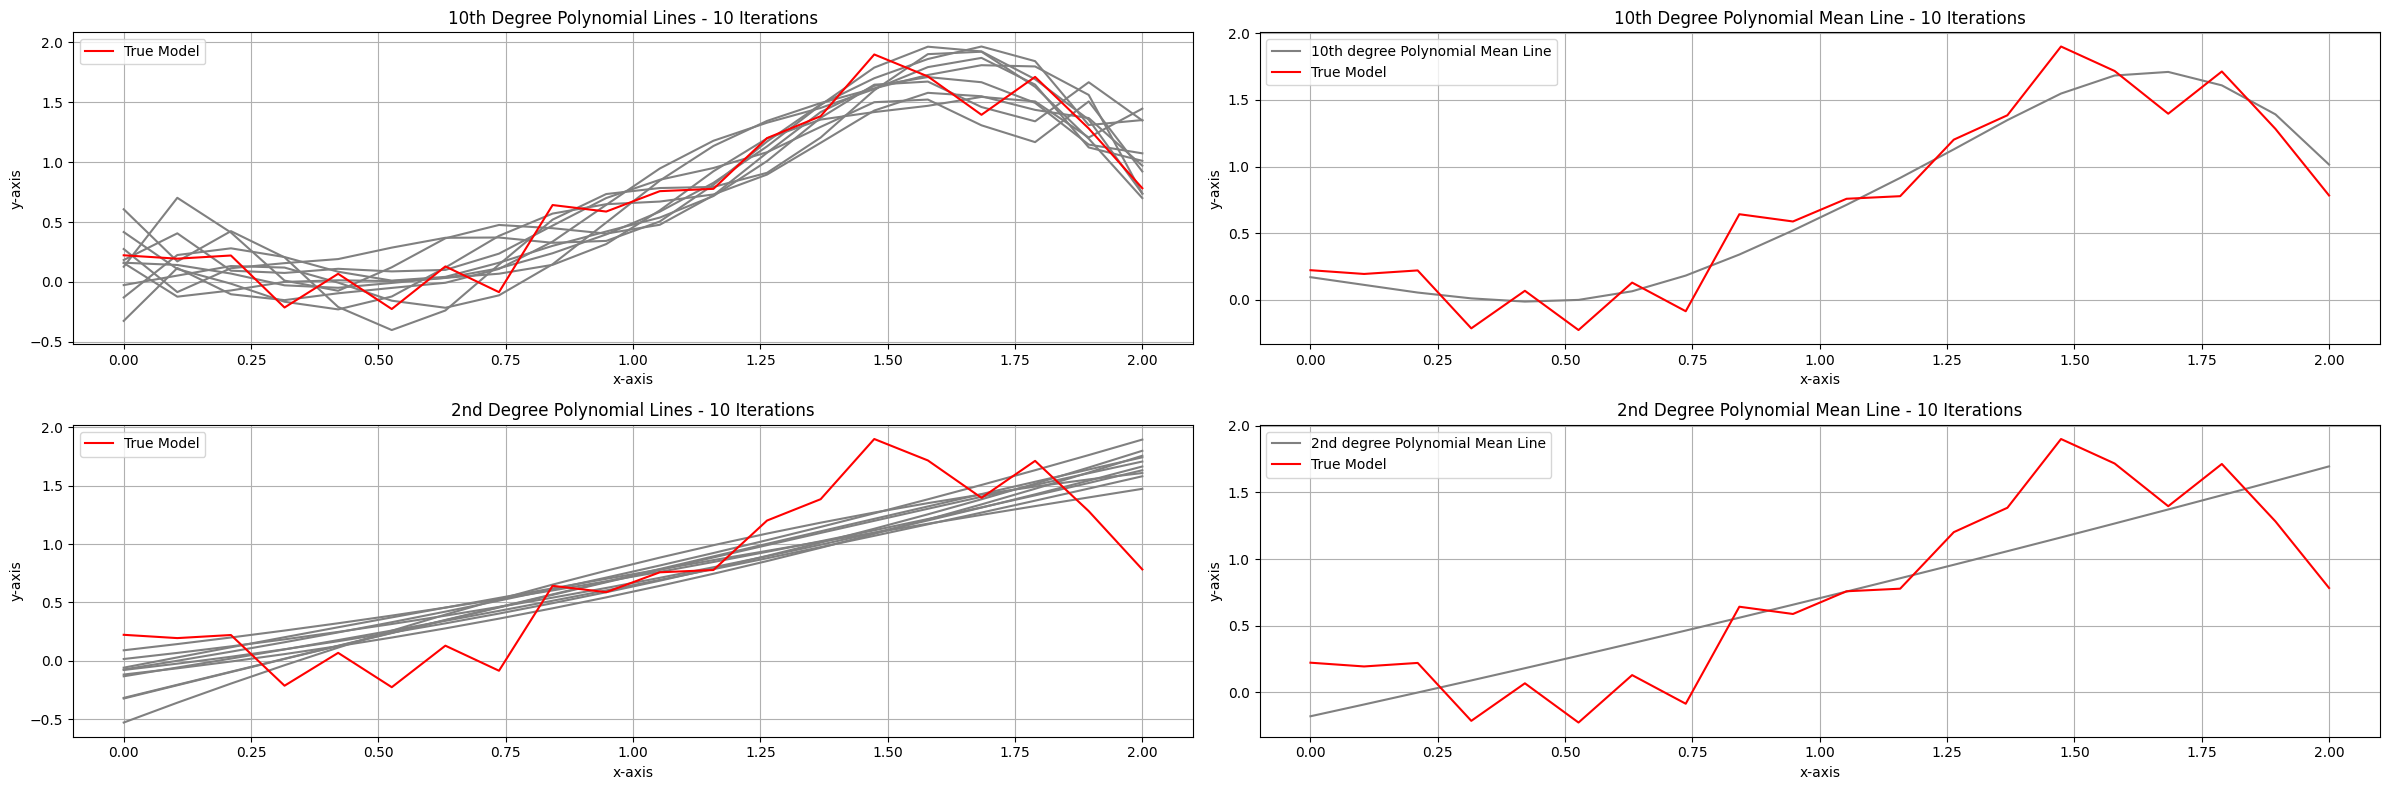

In [ ]:
# curves for 2nd and 10th degree polynomials for all iterations and their mean vs. true curve
plt.figure(figsize=(24, 8))

# all lines of 10th degree polynomial vs. true model line
plt.subplot(2, 2, 1)
for i in range(10): # take 10/100 lines
  plt.plot(x_train, preds_10th[i], color="grey")
plt.plot(x_train, y_train_true, color='red', label="True Model")
plt.title("10th Degree Polynomial Lines - 10 Iterations")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(loc='upper left')
plt.grid(True)

# average line of 10th degree polynomial vs. true model line
plt.subplot(2, 2, 2)
plt.plot(x_train, pred__mean_10th_degree, color="grey", label='10th degree Polynomial Mean Line')
plt.plot(x_train, y_train_true, color='red', label="True Model")
plt.title("10th Degree Polynomial Mean Line - 10 Iterations")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)

# all lines of 2nd degree polynomial vs. true model line
plt.subplot(2, 2, 3)
for i in range(10): # take 10/100 lines
  plt.plot(x_train, preds_2nd[i], color="grey")
plt.plot(x_train, y_train_true, color='red', label="True Model")
plt.title("2nd Degree Polynomial Lines - 10 Iterations")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(loc='upper left')
plt.grid(True)

# average line of 2nd degree polynomial vs. true model line
plt.subplot(2, 2, 4)
plt.plot(x_train, pred__mean_2nd_degree, color="grey", label='2nd degree Polynomial Mean Line')
plt.plot(x_train, y_train_true, color='red', label="True Model")
plt.title("2nd Degree Polynomial Mean Line - 10 Iterations")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

On the above figures, we can observe the bias-variance trade-off as a function of the complexity of the two fitted poynomial models. Graphs on the left show us how 10 of the resulting estimates on different training sets fluctuate around their mean and we can clearly see the higher variance of the 10th degree polynomial vs. the 2nd degree polynomial. On the right, we see how far or close is the mean of all $100$ estimations from the true, optimal curve for both polynomial models. It is obvious that the 2nd degree polynomial has higher bias than the 10th one, as the mean and true curves are not close and as they are in the 10th degree polynomial model, in which curves are very close, meaning very low bias.

## Experiment 3

We generate again $N$ = 20 training points with $\sigma_\eta^2$ = 0.05. We encode our prior knowledge for the unknown vector via a Gaussian distribution $G(\theta)$ $\mu_\theta = \theta (equation 2)$ and covariance matrix $\Sigma_\theta = \sigma_\theta^2I, \sigma_\theta^2=0.1$. We perform Full Bayesian Inference by using the true model and evaluate on a test set of $N1=20$ again. We plot the estimates and their errors on the *(x,y)*. We repeat and compare for larger noise variance of $\sigma^2_\eta = 0.15$ to get an idea of how sensitive the results might be to the level of noise in the data.

Let's analyze a little more what we are going to do. In the previous two experiments with LS method, our goal was to obtain the corresponding single $\hat{\theta}$ vector. In this case, we get gaussian probability distribution functions for the prior and for the noise(inputs) and we want to infer the corresponding pdf that describes the unknown $\theta$ parameter vector by estimating its tuning parameters mean and variance(outputs), getting in this way some more information about the predicted $\theta$.

We have the white noise model $\eta = y - \Phi\theta,
\eta \sim N (0, \sigma_\eta^2 I), \theta \sim N(\mu_\theta, \Sigma_\theta)$, where $\Sigma_\theta = \sigma_\theta^2 I$, $\mu_\theta = \theta_0 = \theta_{true}$(a too optimistic scenario here as our initial guess about the prior is equal to the true one!).

So, having obtained full access to prior randomness and also having the observations, all we have to do is to find the gaussian posterior probability distribution of $p(\theta|y) \sim N(\mu_{\theta|y}, \Sigma_{\theta|y})$, where

 $\mu_{\theta|y} = \theta_0 + \frac{1}{\sigma_{\eta}^2} \Sigma_{\theta|y} \Phi^T (y - \Phi \theta_0)$ and $\Sigma_{\theta|y} = \left( \Sigma_{\theta}^{-1} + \frac{1}{\sigma_\eta^2} \Phi^T \Phi \right)^{-1}$.

We see that there is no need to calculate $\theta$(latent/unobserved variables), which acts as a means to an end and, to make predictions on new data points, we simply calculate

 $\mu_y = \phi^T(x) \mu_{\theta|y}$(mean here as $\hat{\theta}_{MAP}$), also getting an additional information about its confidence(varaiance) with  

 $\sigma_y^2 = \sigma_{\eta}^2 + \sigma_{\eta}^2\sigma_{\theta}^2 \phi^T(x) \left( \sigma_{\eta}^2 I + \sigma_{\theta}^2 \Phi^T \Phi \right)^{-1} \phi(x)$.


In [ ]:
# new parameters
theta_variance = 0.1 # variance of prior
noise_variances = [0.05, 0.15] # 2 experiments with a small and a large noise variances
Sigma_prior = theta_variance * np.eye(5) # covariance matrix of prior, Phi matrix has 6 columns, keeping the structure of the correct model of experiment 1

# storage lists for predicted mu and var
mu_y_all = []
var_y_all = []

# generate noisy training points
noise = np.random.normal(noise_mean, np.sqrt(noise_variance), N) # white gaussian noise with the current noise variance
y_train_3 = f_true(x_train, theta_true) + noise # y = f(x) + noise

# construct Phi matrix for training data of the true model
Phi = np.array([np.ones(N), x_train, x_train**2, x_train**3, x_train**5]).T

# generate test data
x_test_3 = np.sort(np.random.uniform(0, 2, N1))
y_test_3 = f_true(x_test_3, theta_true) # y = f(x)

# construct phi matrix for test data
phi_test = np.array([np.ones(N1), x_test_3, x_test_3**2, x_test_3**3, x_test_3**5]).T

# loop over noise variances
for noise_variance in noise_variances:
  # add noise to training data
  print('Noise variance: ', noise_variance)

  # calculate posterior mean and cov (theta|y)
  Sigma_posterior = np.linalg.inv(np.linalg.inv(Sigma_prior) + 1/noise_variance * Phi.T @ Phi) # Sigma (theta|y) covariance matrix, should be diagonal of (5,5)
  mu_posterior = theta_true + (1/noise_variance) * Sigma_posterior @ Phi.T @ (y_train_3 - Phi @ theta_true) # mu (theta|y) ( @ for matrix multiplication, * for element-wise multiplication) (5,)

  # predictions with Full Bayesian Inference

  # 1. calculate the mean for test set
  mu_y = phi_test @ mu_posterior # (20,)

  # 2. calculate the variance for test set
  inv_term = np.linalg.inv(noise_variance * np.eye(Phi.shape[1]) + theta_variance * Phi.T @ Phi) # inverse term
  var_y = noise_variance + noise_variance * theta_variance * np.diag(phi_test @ inv_term @ phi_test.T) # without diagonal is a (20,20) Cov matrix(from Phi.T@Phi)->get its diag which is the variance (20,) for each test point(diagonal of Cov is the var for each test point)

  # print the results
  #print("Mean:", mu_y) # (20,)
  #print("Variance:", var_y) # (20,)
  print(f"Average Mean: {np.mean(mu_y):.4f}, \nAverage Variance: {np.mean(var_y):.4f}\n")

  # store results for the current noise_variance
  mu_y_all.append(mu_y)
  var_y_all.append(var_y)

Noise variance:  0.05
Average Mean: 0.7511, 
Average Variance: 0.0586

Noise variance:  0.15
Average Mean: 0.7556, 
Average Variance: 0.1732



We get results for posterior variances close to the initial noise variances, let's plot that results to get a better idea about how changing the noise variance affects the predictions.

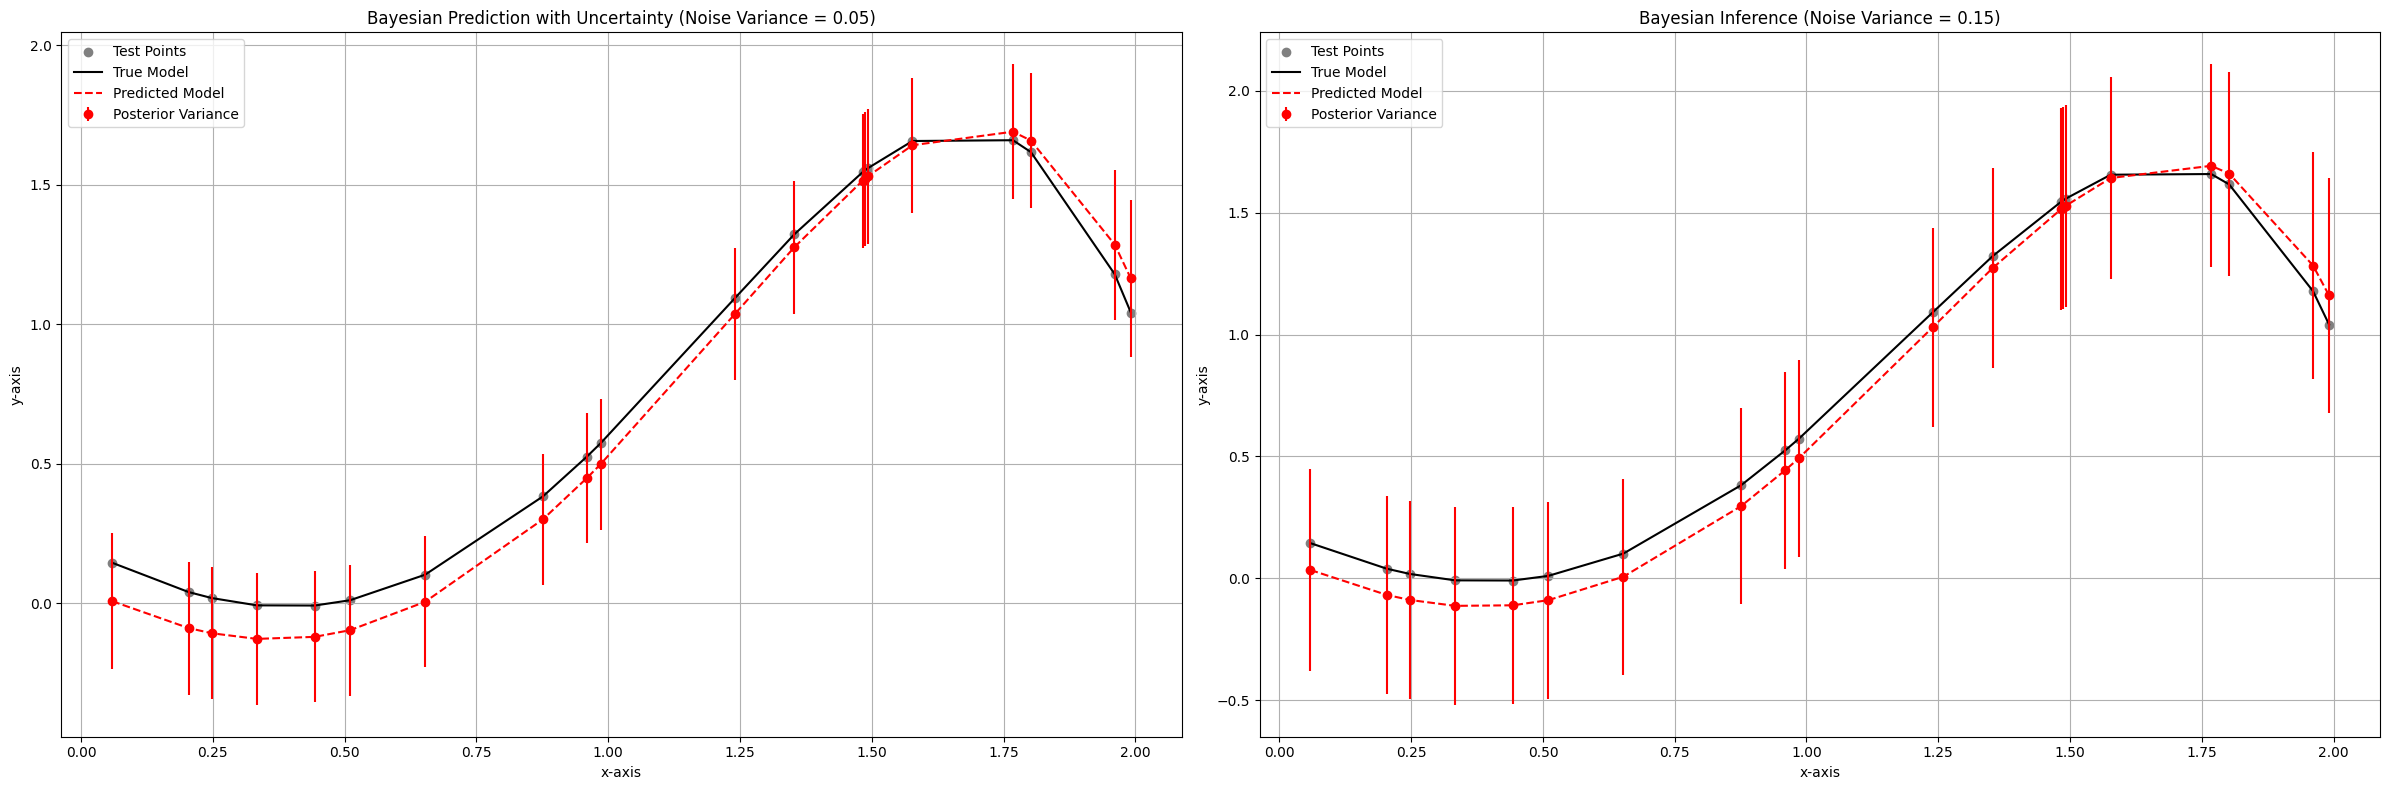

In [ ]:
# plot true vs. predicted lines for the two noise variances
plt.figure(figsize=(24, 8))

# true curve vs. predicted with the small noise variance
plt.subplot(1, 2, 1)
plt.scatter(x_test_3, y_test_3, color='grey', label='Test Points')
plt.plot(x_test_3, y_test_3, 'black', label="True Model")
plt.plot(x_test_3, mu_y_all[0], 'r--', label="Predicted Model")  # mu_y[0] -> for small variance = 0.05
plt.errorbar(x_test_3, mu_y_all[0], yerr=np.sqrt(var_y_all[0]), fmt='o', color='red', label="Posterior Variance")
plt.title("Bayesian Prediction with Uncertainty (Noise Variance = 0.05)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.legend(loc='upper left')

# true curve vs. predicted with the large noise variance
plt.subplot(1, 2, 2)
plt.scatter(x_test_3, y_test_3, color='grey', label='Test Points')
plt.plot(x_test_3, y_test_3, 'black', label="True Model")
plt.plot(x_test_3, mu_y_all[1], 'r--', label="Predicted Model")  # mu_y[1] -> for large variance = 0.15
plt.errorbar(x_test_3, mu_y_all[1], yerr=np.sqrt(var_y_all[1]), fmt='o', color='red', label="Posterior Variance")
plt.title("Bayesian Inference (Noise Variance = 0.15)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Red lines represent the predictions on the test set using bayesian regression,  while the solid black line corresponds to the true values of the test set. We see that the predicted lines are very close to the true ones in both cases, showing the effectivenes of FBI method. What is different and noticeable, however, is the difference in error bars lengths.

The length of the error bars defined by the predicted variance $\sigma_y^2$ and indicates the model's confidence about these predictions. We observe that the error bars are getting larger when applying higher noise variance to the model. So, the larger the noise variance of the model is, the larger the error bars become or, in other words, more uncertainty of the input(higher noise in the training data) produces less confidence in the output predictions(higher posterior variance).

## Experiment 4

Now, we repeat the previous experiment by trying a more realistic initial prior information of: $\theta_{0F} = [-10.54, 0.465, 0.0087, -0.093, -0.004]^T, \sigma_\eta^2 = 0.05, \sigma_\theta^2 = [0.1, 2], N = [20, 500]$.

So, we try 4 combinations here to see how the confidence in our prior and the number of training set affect the predictions.

In [ ]:
# new parameters
theta_mean = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004]) # new theta mean vector (5,)
theta_variances = np.array([0.1, 2])  # 2 values for variance of prior
training_sizes = np.array([20, 500]) # 2 values for N points

# generate test data (only once outside the loop)
x_test_4 = np.sort(np.random.uniform(0, 2, N1))
y_test_4 = f_true(x_test_4, theta_true) # y = f(x), without noise
phi_test = np.array([np.ones(N1), x_test_4, x_test_4**2, x_test_4**3, x_test_4**5]).T # construct phi matrix for test data

# storage dictionary for all combinations
results = {}

# loop over the theta variances
for theta_variance in theta_variances:
  # update Sigma prior
  Sigma_prior = theta_variance * np.eye(5) # covariance matrix of prior, phi matrix has 5 columns

  # loop over the numbere of training points
  for N in training_sizes:
   # generate training data
   x_train_4 = np.linspace(0, 2, N) # equidistant points in [0, 2]
   y_train_noisy = f_true(x_train_4, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # y = f(x) + white gaussian noise with the current noise variance

   # FBI Process

   # construct Phi matrix for training data
   Phi = np.array([np.ones(N), x_train_4, x_train_4**2, x_train_4**3, x_train_4**5]).T # (20,5)

   # calculate posterior mean and variance
   Sigma_posterior = np.linalg.inv(np.linalg.inv(Sigma_prior) + 1/noise_variance * Phi.T @ Phi) # Sigma = Covariance matrix
   mu_posterior = theta_mean + (1/noise_variance) * Sigma_posterior @ Phi.T @ (y_train_noisy - Phi @ theta_mean)

  # predictions with FBI

   # 1. calculate the mean for test set
   mu_y = phi_test @ mu_posterior

   # 2. calculate the variance for test set
   inv_term = np.linalg.inv(noise_variance * np.eye(5) + theta_variance * Phi.T @ Phi) # inverse of the term
   var_y = noise_variance + noise_variance * theta_variance * np.diag(phi_test @ inv_term @ phi_test.T)

   # print mu_y and var_y
   print("Theta Variance:", theta_variance)
   print("Training Points:", N)
   print(f"Average predicted y Mean: {np.mean(mu_y):.4f}")
   print(f"Average predicted y Variance: {np.mean(var_y):.4f}")
   #print("Mean (mu_y):", mu_y)
   #print("Variance (var_y):", var_y)
   print()

   # store the results in the dictionary
   results[(N, theta_variance)] = (mu_y, var_y)

Theta Variance: 0.1
Training Points: 20
Average predicted y Mean: 0.6007
Average predicted y Variance: 0.0586

Theta Variance: 0.1
Training Points: 500
Average predicted y Mean: 0.7156
Average predicted y Variance: 0.0505

Theta Variance: 2.0
Training Points: 20
Average predicted y Mean: 0.7545
Average predicted y Variance: 0.0604

Theta Variance: 2.0
Training Points: 500
Average predicted y Mean: 0.7297
Average predicted y Variance: 0.0506



Let's plot the results to get a better intuition.

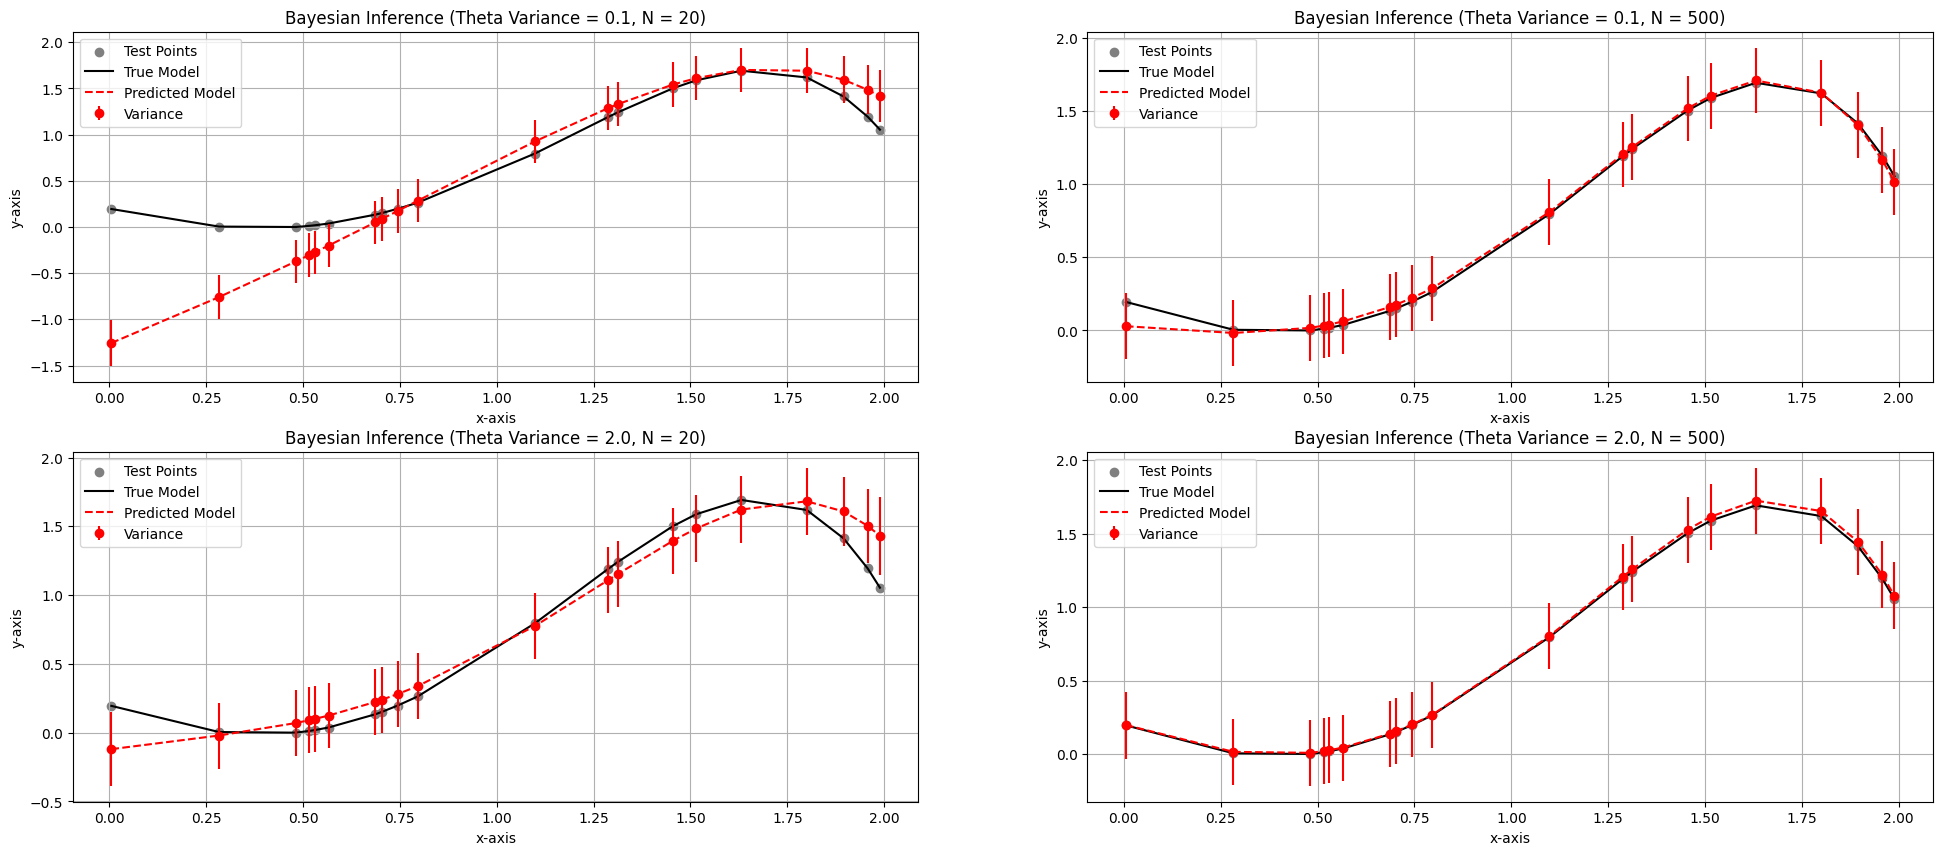

In [ ]:
# plot the results
plt.figure(figsize=(24, 10))

# subplot index
plot_idx = 1

# loop over the theta variances
for theta_variance in theta_variances:
  # loop over the numbere of training points
  for N in training_sizes:
    mu_y, var_y = results[(N, theta_variance)] # retrieve mu_y & var_y for the current N, theta_variance

    # make a subplot for each combination of results
    plt.subplot(len(theta_variances), len(training_sizes), plot_idx)
    plt.scatter(x_test_4, y_test_4, color='grey', label='Test Points')
    plt.plot(x_test_4, y_test_4, 'black', label="True Model")
    plt.plot(x_test_4, mu_y, 'r--', label="Predicted Model")
    plt.errorbar(x_test_4, mu_y, yerr=np.sqrt(var_y), fmt='o', color='red', label="Variance")
    plt.title(f"Bayesian Inference (Theta Variance = {theta_variance}, N = {N})")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend()
    plt.grid(True)

    plot_idx += 1 # go to the next plot

plt.show()

In the above set of figures, experimenting with different values of training set and variances of $\theta$, we see how the predictions vary in comparison with true values on the test set. In the first figure, we assumed good confidence about the new prior(low variance at $0.1$), but it proved wrong, as the predicted red points are away from the true line. In contrast, and keeping the same N training set($20$), in figure 3, we see that having less trust to prior(higher $\theta$ variance), we get better results. In the second figure, with the assumed pretty good confidence in the new prior as in first figure($0.1$), we see that increasing the training set, even for a bad prior, we get better results(even from figure 3, where we had less prior-confidence). Thus, a good training set is very important in order to make good predictions and, obviously, for less confidence(higher $\theta$ variance) to our bad prior and more training points we get the best results. Generally, if we have large number of training points, the influence of the prior is getting less and less. So, the choice of the prior is critical with respect to the final performance of the algorithm.

## Experiment 5

We construct a training set with $N = 500$ and $\sigma_\eta^2 = 0.05$. We will try to recover the true variance of noise $\sigma_\eta^2$ using Expectation-Maximizatiion(EM) method. We initializa $\alpha = \sigma_\theta^{-2} = 1, \beta = \sigma_\eta^{-2} = 1$. After EM, we estimate *y*'s and their errors again on a $N_1$ test set. We use the same prior vector as in the previous experiment.

During Bayesian Inference, we estimated the distribution over the test set, supposing we knew $\sigma_\eta^2$ and $\sigma_\theta^2$. But, we normally don't know them and we are going to make estimates by applying EM method. After estimating both variances $\mu_{\theta|y}$ and $\Sigma_{\theta|y}$, we will make predictions based on a new test set like we did in the experiment 3. We use the equations:

$\mu_y = \phi(x) \mu_{\theta \mid y}$,

$\mu_{\theta \mid y} = b \Sigma_{\theta \mid y} \Phi^T y$,

$\Sigma_{\theta \mid y} = \left( a I + b \Phi^T \Phi \right)^{-1}$,

$\sigma_y^2 = \sigma_{\eta}^2 + \sigma_{\eta}^2\sigma_{\theta}^2 \phi^T(x) \left( \sigma_{\eta}^2 I + \sigma_{\theta}^2 \Phi^T \Phi \right)^{-1} \phi(x)$.

In [ ]:
# new parameters
N = 500 # training set for this experiment
alpha = 1 # alpha for EM method
beta = 1 # beta for EM method
epsilon = 1e-7 # tolerance for convergence
iterations = 0 # counter for iterations, useful for plotting

# storage lists for a, b
alphas = []
betas = []

# generate new training set for N=500 and construct Phi
x_train_5 = np.linspace(0, 2, N) # equidistant points in [0, 2]
y_train_5 = f_true(x_train_5, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N)
Phi = np.array([np.ones(N), x_train_5, x_train_5**2, x_train_5**3, x_train_5**5]).T # (500,5)

# generate test set construct phi
x_test_5 = np.sort(np.random.uniform(0, 2, N1))
y_test_5 = f_true(x_test_5, theta_true)
phi_test = np.array([np.ones(N1), x_test_5, x_test_5**2, x_test_5**3, x_test_5**5]).T # (20,5)

# Expectation-Maximization Process (EM algorithm)
while True:

  # 1. Expectation step - calculate posterior covariance and mean
  Sigma = np.linalg.inv(alpha * np.eye(Phi.shape[1]) + beta * Phi.T @ Phi) # Phi.T @ Phi -> (5,5)
  mu = beta * Sigma @ Phi.T @ y_train_5

  # 2. Maximization step - calculate A and B
  A = np.linalg.norm(mu)**2 + np.trace(Sigma)
  B = np.linalg.norm(y_train_5 - Phi @ mu)**2 + np.trace(Phi @ Sigma @ Phi.T)

  new_alpha = Phi.shape[1]  / A # K = Phi.shape[1]
  new_beta = N / B

  # count the iterations
  iterations += 1

  # store alpha and beta
  alphas.append(new_alpha)
  betas.append(new_beta)

  # check for converge
  if np.abs(new_alpha - alpha) < epsilon and np.abs(new_beta - beta) < epsilon:
    break

  # update parameters
  alpha = new_alpha
  beta = new_beta

theta_variance = 1 / alpha
noise_variance = 1 / beta

# print the results
print("EM Algorithm Results:")
print(f"Estimated prior variance: {theta_variance:.4f}")
print(f"Estimated noise variance: {noise_variance:.4f}")

# predict(=find mu_y, var_y on test set) with estimated variances

# mu_y calculation (mu = posterior mu_theta_y)
mu_y = phi_test @ mu

# var_y calculation
inv_term = np.linalg.inv(noise_variance * np.eye(5) + theta_variance * Phi.T @ Phi) # inverse term(cov, symmetric matrix, its diag the variance)
var_y = noise_variance + noise_variance * theta_variance * np.diag(phi_test @ inv_term @ phi_test.T)

# print the results
print("\nPredicted mean and variance on test set:")
#print("Mean:", mu_y)
#print("Variance:", var_y)
print(f"Average predicted y Mean: {np.mean(mu_y):.4f}")
print(f"Average predicted y Variance: {np.mean(var_y):.4f}")

EM Algorithm Results:
Estimated prior variance: 0.4938
Estimated noise variance: 0.0512

Predicted mean and variance on test set:
Average predicted y Mean: 0.9752
Average predicted y Variance: 0.0516


We observe that we get an estimated noise variance very close to the initial one. Let's plot the results.

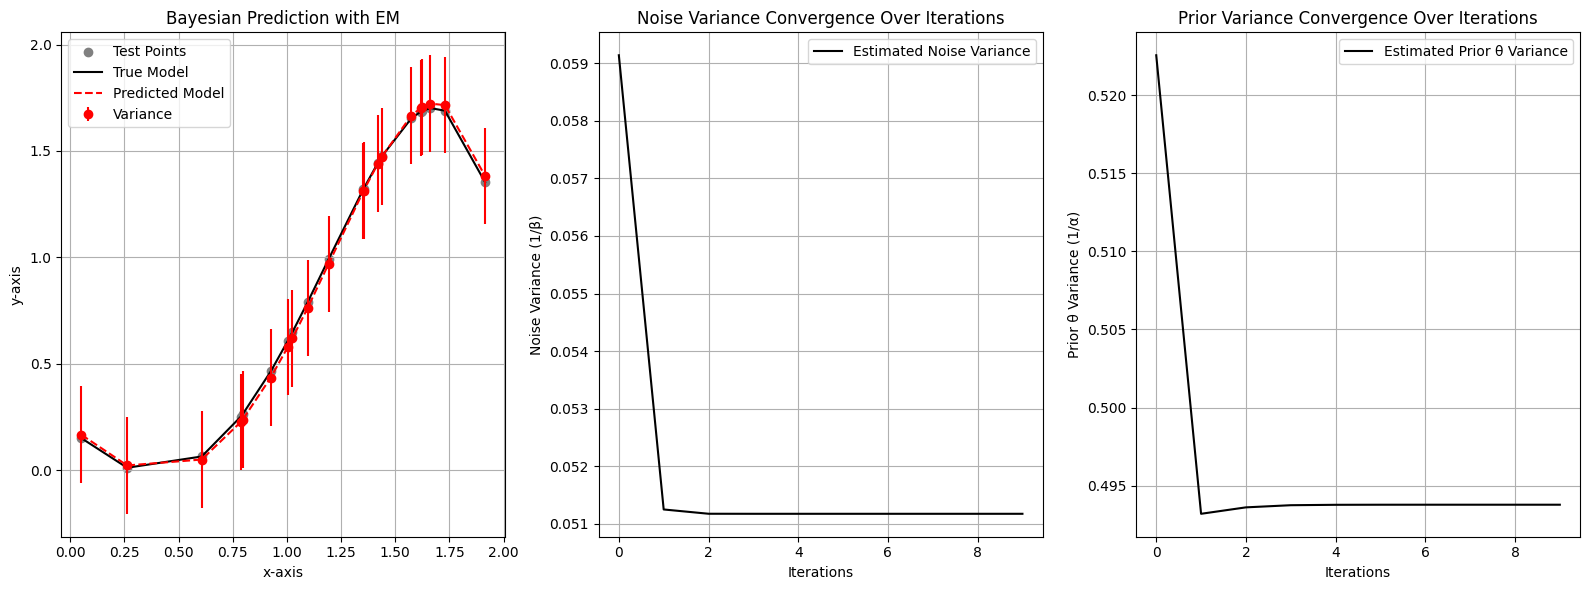

In [ ]:
# plot the results
plt.figure(figsize=(16, 6))

# true curve vs. predicted with the EM estimated mean and var
plt.subplot(1, 3, 1)
plt.scatter(x_test_5, y_test_5, color='grey', label='Test Points')
plt.plot(x_test_5, y_test_5, 'black', label="True Model")
plt.plot(x_test_5, mu_y, 'r--', label="Predicted Model")
plt.errorbar(x_test_5, mu_y, yerr=np.sqrt(np.mean(var_y)), fmt='o', color='red', label="Variance")
plt.title("Bayesian Prediction with EM")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(loc='upper left')
plt.grid(True)

# plot varianace curves convergence over iterations

noise_vars = 1 / np.array(betas) # convert noise var from stored betas
theta_vars = 1 / np.array(alphas) # convert theta var from stored alphas

# noise variance converge
plt.subplot(1, 3, 2)
plt.plot(range(iterations), noise_vars, color = 'black', label="Estimated Noise Variance")
#plt.axhline(y=0.05, color='r', linestyle='--', label="True Noise Variance (0.05)")
plt.xlabel("Iterations")
plt.ylabel("Noise Variance (1/β)")
plt.title("Noise Variance Convergence Over Iterations")
plt.legend()
plt.grid(True)

# prior variane converge
plt.subplot(1, 3, 3)
plt.plot(range(iterations), theta_vars, color = 'black', label="Estimated Prior θ Variance")
#plt.axhline(y=0.1, color='r', linestyle='--', label="Initial Prior Variance (0.1)")
plt.xlabel("Iterations")
plt.ylabel("Prior θ Variance (1/α)")
plt.title("Prior Variance Convergence Over Iterations")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Prediction line is so close with the true one, almost perfectly aligned in some points. Near, we see how EM converges to these values of variances through just few iterations for our simple example.

## Experiment 6

When performing regression or density estimation, many approaches rely on assumptions about the underlying data distribution (e.g., parametric forms or prior knowledge). However, in situations where we have no such prior information, we can turn to **non-parametric methods** that make minimal assumptions. One such method is **Parzen window estimation**, which estimates probability density functions by averaging kernel functions centered at each data point. When using Gaussian kernels, this technique becomes a powerful tool for flexible, smooth approximations of distributions (see [Bishop, 2006](https://link.springer.com/book/10.1007/978-0-387-45528-0)).

In all the previous experiments we had or assumed some knowledge about the data, let's see now what if we don't know anything about it and try Parzen windows with gaussian kernels(non-parametric method of estimation):

$\hat{p}(z) = \frac{1}{N(2\pi h^2)^{L/2}} \sum_{i=1}^{N} \exp \left( -\frac{\|z - z_i\|^2}{2h^2} \right)$

We consider a regression problem for $(x_i, y_i), 1, 2, ... N$, assuming both joint pdf $p(x, y)$ and the marginal $p(x)$ are represented by the corresponding Parzen window representations. We want to derive the $MSE$ optimal estimate:

$y = \hat{g}(x) = E[y | x] = \int y \frac{p(x,y)}{p(x)} dy$,

where

$\hat{p}(x,y) = \frac{1}{N(2\pi h^2)^{L/2}} \sum_{i=1}^{N} \exp \left( -\frac{(x-x_i)^2 + (y-y_i)^2}{2h^2} \right)$

$\hat{p}(x) = \frac{1}{N(2\pi h^2)^{1/2}} \sum_{i=1}^{N} \exp \left( -\frac{(x-x_i)^2}{2h^2} \right)$

Plugging the expressions for $\hat{p}(x,y)$ and $\hat{p}(x)$ into the conditional expectation formula:

$g(x) = \int \frac{y \hat{p}(x, y)}{\hat{p}(x)}dy$, we take:

$g(x) = \frac{1}{\hat{p}(x)} \int y \cdot \hat{p}(x, y)dy
      = \frac{1}{\hat{p}(x)} \cdot \int y \left( \left( \frac{N}{2 \pi h^2} \right)^{L/2} \sum_{i=1}^{N} \exp \left( - \frac{(x - x_i)^2 + (y - y_i)^2}{2 h^2} \right) \right)dy$.

By exchanging the order of summation and integration:

$g(x) = \frac{1}{\hat{p}(x)} \cdot \left( \frac{N}{2 \pi h^2} \right)^{L/2} \sum_{i=1}^{N} \exp \left( - \frac{(x - x_i)^2}{2 h^2} \right) \int y \exp \left( - \frac{(y - y_i)^2}{2 h^2} \right) dy$.

The integral is the expected value of a Gaussian centered at $y_i$, which evaluates to $y_i \cdot \sqrt{2 \pi h^2}$, so we take:

$g(x) = \frac{1}{\hat{p}(x)} \cdot \left( \frac{N}{2 \pi h^2} \right)^{L/2} \sum_{i=1}^{N} y_i \exp \left( - \frac{(x - x_i)^2}{2 h^2} \right) \cdot \sqrt{2 \pi h^2}$.

Simplifying and canceling constants, and noting that $L=2$, as we're working with $2D$ $(x,y)$ in our case, we end up with:

$g(x) = \frac{\sum_{i=1}^{N} y_i \exp \left( -\frac{(x-x_i)^2}{2h^2} \right)}{\sum_{i=1}^{N} \exp \left( -\frac{(x-x_i)^2}{2h^2} \right)}$.

*A detailed derivation of this result can be found in Pattern Recognition and Machine Learning by Christopher M. Bishop (Section 2.5.2, Nadaraya-Watson kernel regression).*

Using exactly this equation, we perform the experiment for $N = [20, 500]$ training points again with $\sigma_\eta^2 = 0.05, h = \frac{1}{\sqrt{N}}$ and $N1 = 20$ test points, evaluating with $MSE = \frac{1}{N_1} \sum_{j=1}^{N_1} (y_j - g(x_j))^2$.

N = 20, h = 0.2236, MSE = 0.0341
N = 500, h = 0.0447, MSE = 0.0017


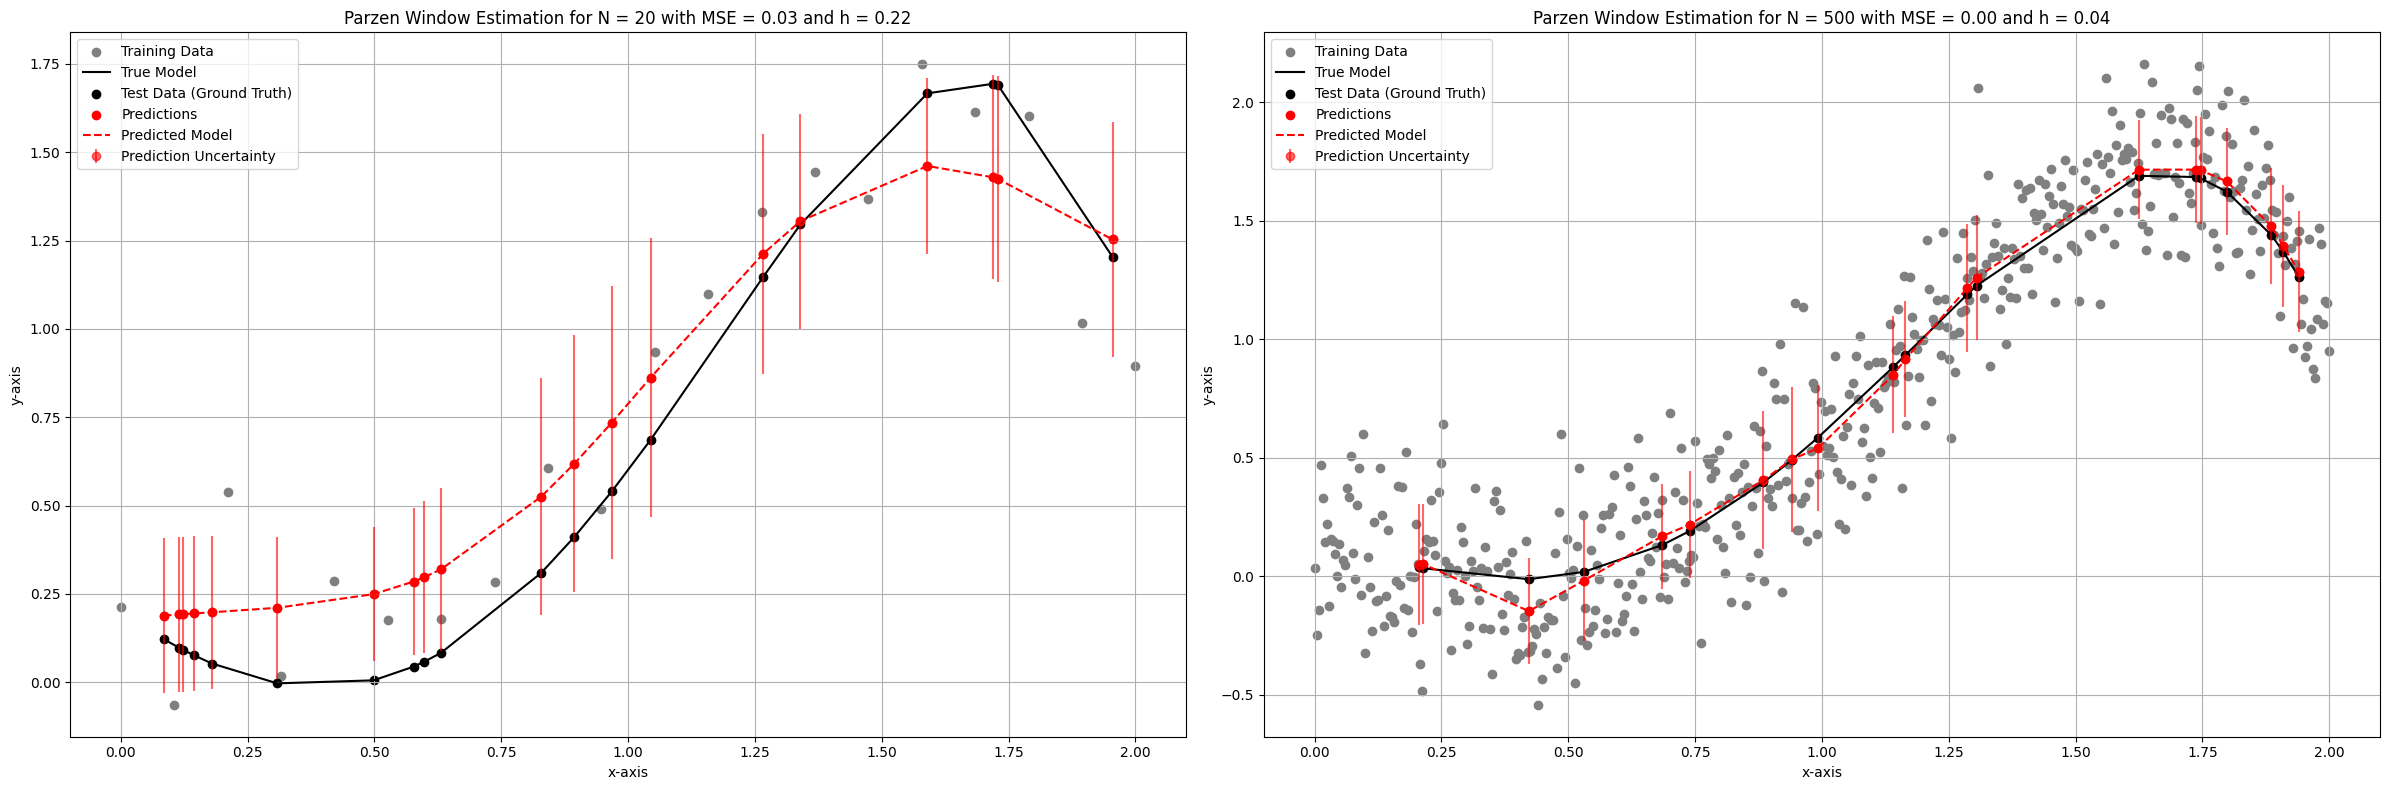

In [ ]:
# new parameters
training_sizes = [20, 500]
mse_results = [] # storage for MSE results
plot_idx = 1 # subplot index

# g(x) function - essentialy g(x) = y_pred is a weighted average on y(i)'s where weights determined by gaussian kernels
def g(x_train, y_train, x_test, h):
  y_pred = []
  y_var = [] # just for adding error bars in plot
  for x in x_test:
    weights = np.exp(-((x - x_train) ** 2) / (2 * h**2))
    weight_sum = np.sum(weights)
    g_x = np.sum(weights * y_train) / weight_sum
    var_x = np.sum(weights * (y_train - g_x)**2) / weight_sum # weighted distance from mean g(x) on average
    y_pred.append(g_x)
    y_var.append(var_x)
  return np.array(y_pred), np.array(y_var)

# create a plot figure - we plot for different N (and therefore different training and test sets here)
plt.figure(figsize=(24, 8))

# loop over the 2 training sets
for N in training_sizes:

  # generate training data
  x_train_6 = np.linspace(0, 2, N)
  y_train_6 = f_true(x_train_6, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N)

  # generate test data
  x_test_6 = np.sort(np.random.uniform(0, 2, N1))
  y_test_6 = f_true(x_test_6, theta_true)

  # calculate the width of parzen windows for the current N
  h = 1 / np.sqrt(N)

  # predictions
  y_pred, y_var = g(x_train_6, y_train_6, x_test_6, h)

  # calculate and print mse for the current N
  mse = np.mean((y_test_6 - y_pred) ** 2)
  print(f"N = {N}, h = {h:.4f}, MSE = {mse:.4f}")

  # store mse result for the current N
  mse_results.append(mse)

  # plot the results
  plt.subplot(1, len(training_sizes), plot_idx)
  plt.scatter(x_train_6, y_train_6, color="grey", label="Training Data")
  plt.plot(x_test_6, y_test_6, color='black', label="True Model")
  plt.scatter(x_test_6, y_test_6, color="black", label="Test Data (Ground Truth)")
  plt.scatter(x_test_6, y_pred, label="Predictions", color="red")
  plt.plot(x_test_6, y_pred, 'r--', label="Predicted Model")
  plt.errorbar(x_test_6, y_pred, yerr=np.sqrt(y_var), fmt='o', color='red', alpha=0.6, label="Prediction Uncertainty")
  plt.title(f"Parzen Window Estimation for N = {N} with MSE = {mse:.2f} and h = {(1 / np.sqrt(N)):.2f}")
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.legend()
  plt.grid(True)
  plot_idx += 1 # go to the next plot

plt.tight_layout()
plt.show()

For $N = 500$ and very small h, the predicted line is in perfect alignment the true one. Smaller error bars indicate reduced uncertainty, as the increased data allows the bin/kernel to capture more details. And this is obvious in MSE value, which is almost zero. On the other hand, for $N = 20$ and higher h, we don't get such good results as in the previous case. The model can't predict the true function because of the limited size of the data, despite larger $h$. We also see large error bars, which reflect to more uncertainty on the predictions. To sum up, increasing the size of the dataset and keeping the length of the kernel small improves the model's predictive accuracy with a descent risk of overfitting.

## Experiment 7

### Main Initializations.

We perform each of the above experiments for $M = 1000$ times, using different training dataset sizes, different noice variance values as well as prior variances and kernel lengths. The value of the MSE Cost Function over the points in test set is $\frac{1}{N_1} \sum_{i=1}^{N_1} \left( y_i - \theta_0 - \theta_1 x(i) - \theta_2 x(i)^2 - \theta_3 x(i)^3 - \theta_5 x(i)^5 \right)^2$ and its expectation value over all $M$ is the average $\bar{E} = \frac{1}{M} \sum_{j=1}^{M} E_j$. We present the results at the end in a table and comment the results where needed.

In [3]:
# parameters again
training_sizes = [20, 500] # training sets
N1 = 20 # test set
M = 1000 # number of iterations
h_sizes = [0.03, 0.06, 0.1, 0.6] # h value
noise_variances = [0.01, 0.05, 0.2]  # different noise variance values
noise_variance = 0.05 # baseline noise variance
noise_mean = 0 # mean of noise
theta_true = np.array([0.2, -1, 0.9, 0.7, -0.2]) # true model's coefficients - optimistic initial prior guess!
theta_false = np.array([-10.54, 0.465, 0.0087, -0.093, -0.004]) # true model's coefficients 2 - realistic initial prior
theta_variances = np.array([0.1, 2])  # 2 values for variance of prior

# function to calculate mse
def mse(y_test, y_pred):
  return np.mean((y_pred - y_test)**2)

# function to plot mse vs. iterations
def plot_mse(mses_dict):
  plt.figure(figsize=(6 * len(training_sizes), 5))
  for N, mses in mses_dict.items():
    plt.plot(range(len(mses)), mses, marker='o', label=f"N = {N}")
  plt.title("MSE vs. Iteration")
  plt.xlabel("Iterations")
  plt.ylabel("MSE")
  #plt.yscale('log') # (values for N=500 too low)
  plt.legend()
  plt.grid(True)
  plt.show()

### Experiment 7.1. LS method for $M$ iterations with different $N$ and $\sigma^2_{\eta}$ values for the true model.


Noise Variance: 0.01
N = 20, Variance = 0.01, Expectation Value = 0.0022
N = 500, Variance = 0.01, Expectation Value = 0.0001

Noise Variance: 0.05
N = 20, Variance = 0.05, Expectation Value = 0.0111
N = 500, Variance = 0.05, Expectation Value = 0.0005

Noise Variance: 0.2
N = 20, Variance = 0.2, Expectation Value = 0.0424
N = 500, Variance = 0.2, Expectation Value = 0.0019


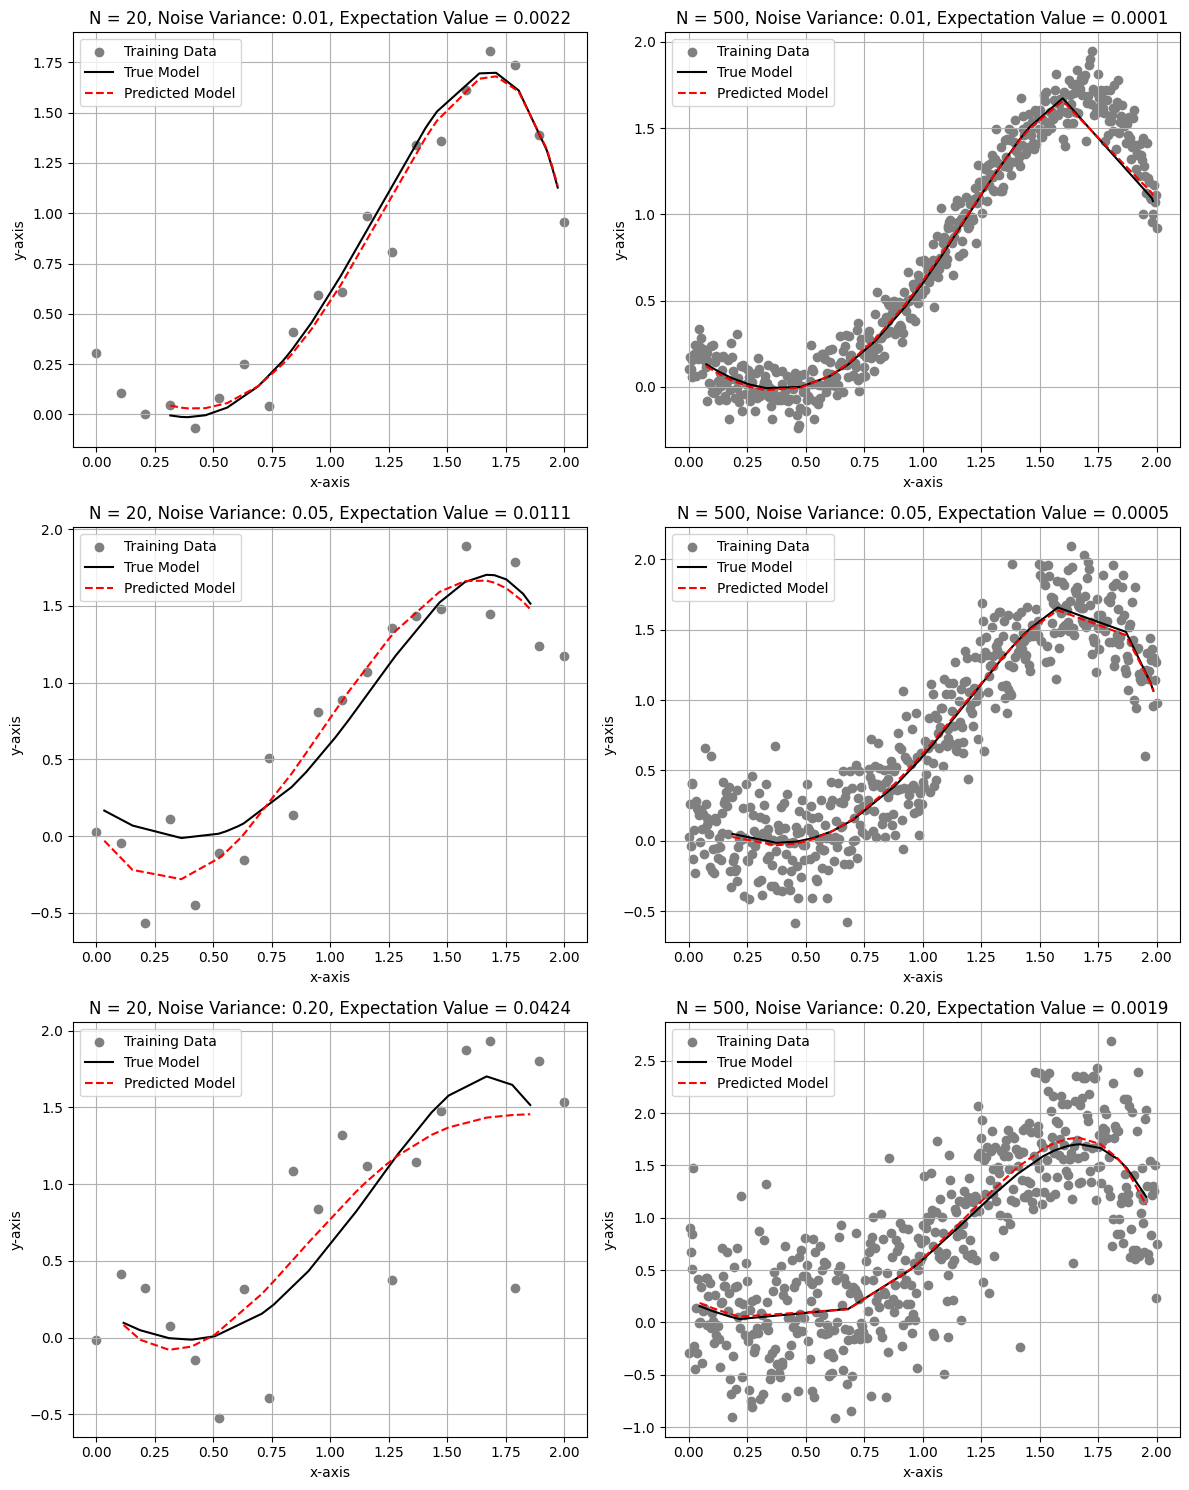

In [ ]:
# parameters
mses_dict_1 = {}  # storage dictionary for mses
plot_idx = 0  # index for plotting

# prepare subplots
n_rows = 3
n_cols = (len(training_sizes) * len(noise_variances) + n_rows - 1) // n_rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()  # flatten axes for easy indexing

# Loop over noise variances and training sizes
for variance in noise_variances:
    print(f"\nNoise Variance: {variance}")

    for N in training_sizes:
        mses = []  # atorage list for mses
        predictions = []  # storage list for predictions

        # perform M iterations
        for i in range(M):
            # generate training data
            x_train_7_1 = np.linspace(0, 2, N)
            y_train_7_1 = f_true(x_train_7_1, theta_true) + np.random.normal(noise_mean, np.sqrt(variance), N)

            # generate test data
            x_test_7_1 = np.sort(np.random.uniform(0, 2, N1))
            y_test_7_1 = f_true(x_test_7_1, theta_true)

            # calculate Phi matrix and theta estimates using LS method
            Phi_7_1 = np.array([np.ones(N), x_train_7_1, x_train_7_1**2, x_train_7_1**3, x_train_7_1**5]).T
            theta_hat_7_1 = np.linalg.inv(Phi_7_1.T @ Phi_7_1) @ Phi_7_1.T @ y_train_7_1

            # calculate Phi_test matrix and make predictions
            phi_test_7_1 = np.array([np.ones(N1), x_test_7_1, x_test_7_1**2, x_test_7_1**3, x_test_7_1**5]).T
            y_pred_7_1 = phi_test_7_1 @ theta_hat_7_1
            predictions.append(y_pred_7_1)

            # calculate and store mse for the current iteration
            current_mse = mse(y_test_7_1, y_pred_7_1)
            mses.append(current_mse)

        # store mses for the current combination of N and noise variance
        mses_dict_1[(variance, N)] = mses  # (variance, N) = mses

        # calculate expectation value (mean of mses)
        exp_val_7_1 = np.mean(mses)

        # calculate mean, std of predictions
        mean_pred = np.mean(predictions, axis=0)
        std_pred = np.std(predictions, axis=0)

        # print the results
        print(f"N = {N}, Variance = {variance}, Expectation Value = {exp_val_7_1:.4f}")

        # plot the results
        ax = axes[plot_idx]
        ax.scatter(x_train_7_1, y_train_7_1, color="grey", label="Training Data")
        ax.plot(x_test_7_1, y_test_7_1, color="black", label="True Model")
        ax.plot(x_test_7_1, y_pred_7_1, 'r--', label="Predicted Model")
        ax.set_title(f"N = {N}, Variance = {variance}, Exp. Value = {exp_val_7_1:.4f}")
        ax.set_title(f"N = {N}, Noise Variance: {variance:.2f}, Expectation Value = {exp_val_7_1:.4f}")
        ax.set_xlabel("x-axis")
        ax.set_ylabel("y-axis")
        ax.legend()
        ax.grid(True)

        plot_idx += 1  # go to the next plot

plt.tight_layout()
plt.show()
 #plot_mse(mses_dict_1)

The results demonstrate the impact of noise variance and training size on model performance. For smaller training set($N = 20$), the model fails to accurately capture the precise true curve, especially with higher noise variance($\sigma_{\eta} = 0.2$), resulting in larger deviations and higher MSE(and expectation value). Larger training set($N = 500$) significantly improves model's performance, with the mean predictions 'line' very close to the line of the true model, even under higher noise variances. Lower noise variance($\sigma_{\eta} = 0.01$) consistently leads to better predictions and lower MSE across both training sizes, as the data is less corrupted by the noise. Overall, increasing the training size addreses the negative impact of higher noise variance, highlighting in this way, another trade-off between noise and training data sizes.

### Experiment 7.2. LS method for $M$ iterations with different $N$ and $\sigma^2_{\eta}$ values for the full true model with the $4^{th}$ degree power.

N = 20, Expectation Value = 0.0125
N = 500, Expectation Value = 0.0006


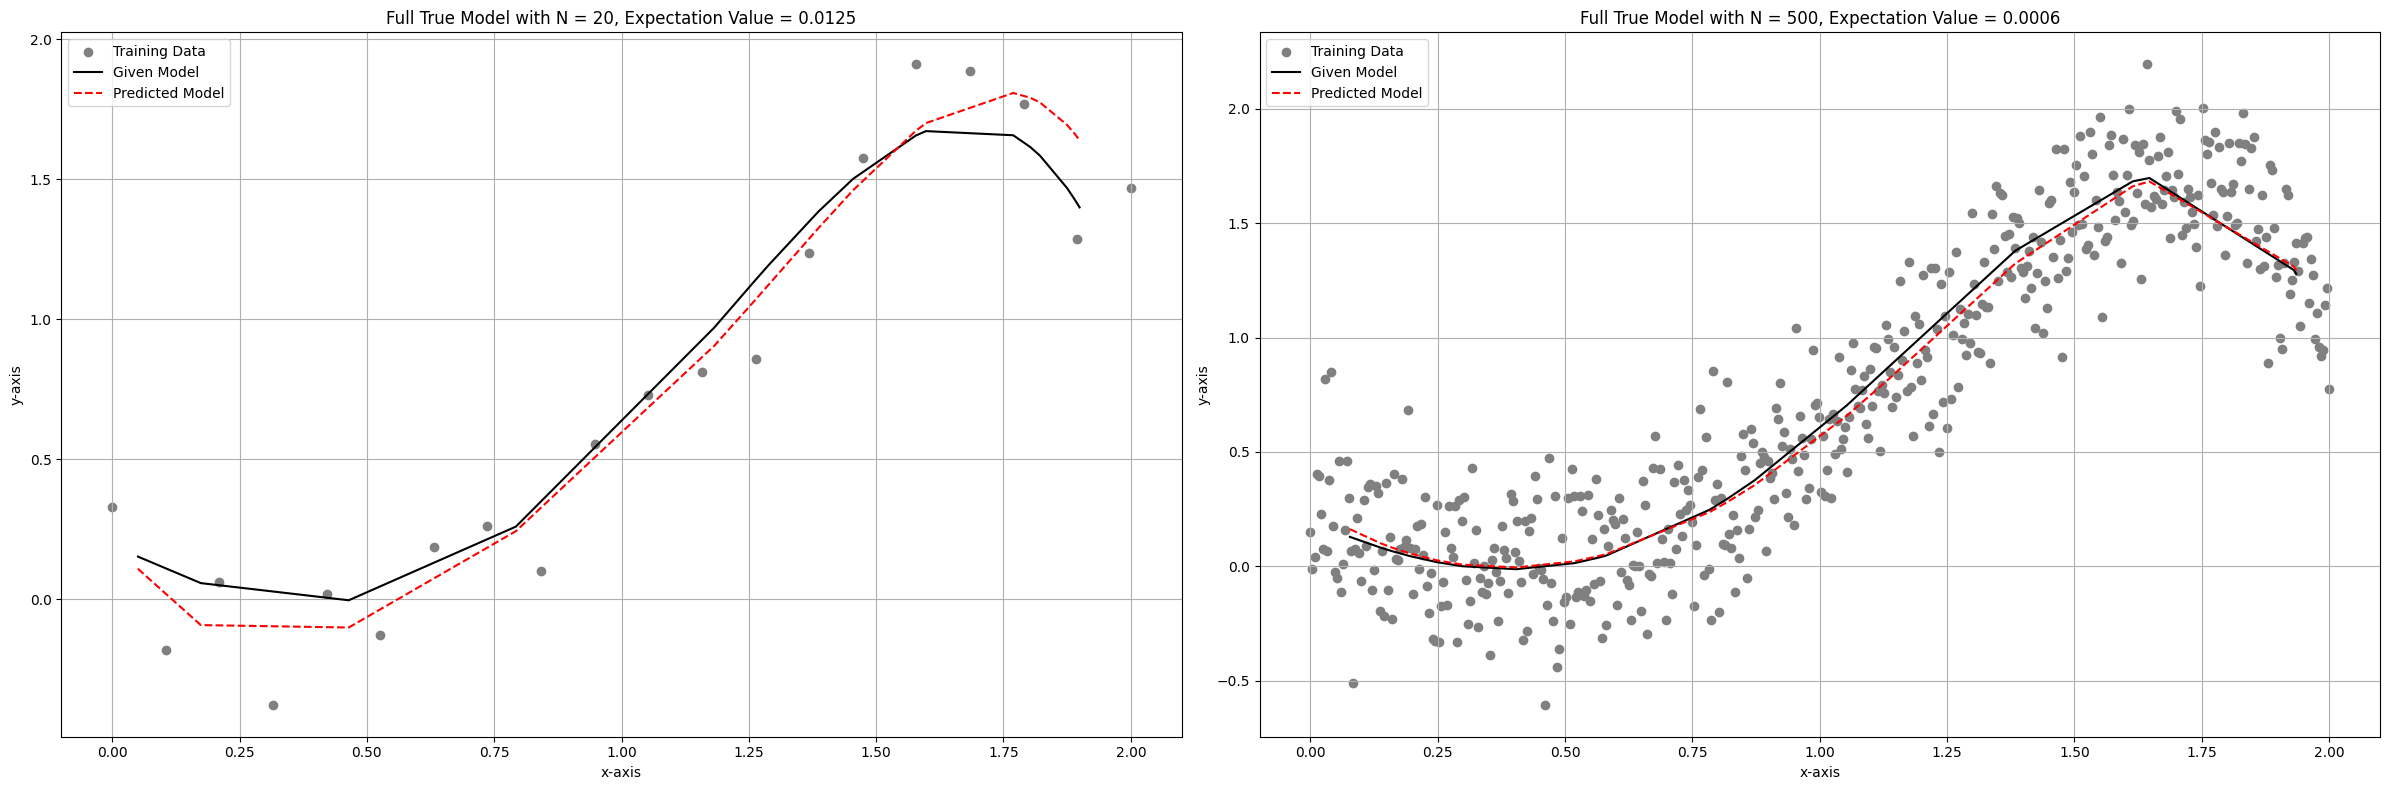

In [ ]:
# parameters
mses_dict_1 = {} # storage dictionary for mses

# loop over N and plot results in subplots
fig, axes = plt.subplots(1, len(training_sizes), figsize=(24, 8))
for idx, N in enumerate(training_sizes):

  # storage list for mses and predictions
  predictions = []
  mses = []

  for i in range(M):

    # generate training data
    x_train_7_1 = np.linspace(0, 2, N) # equidistant N points on x-axis in [0,2] again!
    y_train_7_1 = f_full(x_train_7_1, theta_full) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # y = f(x) + white gaussian noise with the current noise variance

    # generate test(validation) data
    x_test_7_1 = np.sort(np.random.uniform(0, 2, N1))
    y_test_7_1 = f_full(x_test_7_1, theta_full)

    # calculate Phi and theta estimates using LS method
    Phi_7_2 = np.array([np.ones(N), x_train_7_1, x_train_7_1**2, x_train_7_1**3, x_train_7_1**4, x_train_7_1**5]).T
    theta_hat_7_1 = np.linalg.inv(Phi_7_2.T @ Phi_7_2) @ Phi_7_2.T @ y_train_7_1

    # calculate phi and make predictions
    phi_test_7_2 = np.array([np.ones(N1), x_test_7_1, x_test_7_1**2, x_test_7_1**3, x_test_7_1**4,x_test_7_1**5]).T
    y_pred_7_1 = phi_test_7_2 @ theta_hat_7_1
    predictions.append(y_pred_7_1)

    # calculate and store mses for the current iteration
    current_mse = mse(y_test_7_1, y_pred_7_1)
    mses.append(current_mse)

  # store mses for the current N
  mses_dict_1[N] = mses # i N=[20, 500] with 1000 elements each

  # calculate expectation value  for the current combination
  exp_val_7_1 = np.mean(mses)

  # calculate mean, std of predictions for error bars
  #mean_pred = np.mean(predictions, axis=0)
  #std_pred = np.std(predictions, axis=0)

  # print the results
  print(f"N = {N}, Expectation Value = {exp_val_7_1:.4f}")

  # Plot the results
  ax = axes[idx]
  ax.scatter(x_train_7_1, y_train_7_1, color="grey", label="Training Data")
  ax.plot(x_test_7_1, y_test_7_1, color='black', label="Given Model")
  ax.plot(x_test_7_1, y_pred_7_1, 'r--', label="Predicted Model")
  ax.set_title(f"Full True Model with N = {N}, Expectation Value = {exp_val_7_1:.4f}")
  ax.set_xlabel("x-axis")
  ax.set_ylabel("y-axis")
  ax.legend(loc='upper left')
  ax.grid(True)

plt.tight_layout()
plt.show()

# plot mses vs. iterations
#plot_mse(mses_dict_1)

The plots effectively illustrate the prediction lines. Again, we see the impact of training samples size $N$ on the fit of the predicted model. For
$N = 20$, the mean predictions follow the true model but with very noticeable deviations due to limited training data. On the other hand, for $N = 500$, the predictions are closer to the test points of the given model, as evidenced by the lower expectation value of the mean squared error (MSE).

### Experiment 7.3. Train a $2nd$ and a $10th$ degree polynomial models for different priors over $M$ on different training sets $N$ with LS method.

In [ ]:
# function to plot true vs. predicted curve after all iterations
def plot_true_vs_predicted_after_all_iterations(x_test, y_test, all_predictions, model_theta, degree_label, N):
    plt.figure(figsize=(8, 6))

    # plot the true values
    plt.scatter(x_test, y_test, color='grey', label='Test Points')
    plt.plot(x_test, y_test, color="black", label="True Curve")

    # Plot all predictions
    for i, y_pred in enumerate(all_predictions):
        plt.plot(x_test, y_pred, color='red', label="Prediction Curve")

    plt.title(f"True vs. Predicted Curves - {model_theta} ({degree_label}), N = {N}")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

In [ ]:
# storage dictionary for results
results = {}

# experiment loop
for model_theta, theta_label in zip([theta_true], ["Prior"]): # if want to try and the false theta add: , theta_false , "Prior_2"
  mses_dict = {} # storage dictionary for mses
  print(f"\nPrior: {model_theta}")

  for degree, degree_label in zip([2, 10], ["2nd-degree polynomial", "10th-degree polynomial"]):

    for idx, N in enumerate(training_sizes):
      for i in range(M):
        mses = [] # storage list for mses
        preds = [] # storage list for predictions

        # generate training data
        x_train_7_3 = np.linspace(0, 2, N) # equidistant N points on x-axis in [0,2]
        y_train_7_3 = f_true(x_train_7_3, model_theta) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # y = f(x) + noise

        # generate test data
        x_test_7_3 = np.sort(np.random.uniform(0, 2, N1))
        y_test_7_3 = f_true(x_test_7_3, model_theta)

        # construct Phi train and test matrices
        Phi_7_3 = create_Phi(x_train_7_3, 2)
        phi_test_7_3 = create_Phi(x_test_7_3, 2)

        # compute theta estimates
        theta_hat_7_3 = least_squares(Phi_7_3, y_train_7_3)

        # make predictions and store them
        y_pred_7_3 = phi_test_7_3 @ theta_hat_7_3
        preds.append(y_pred_7_3)

        # calculate and store mses for the current iteration
        current_mse = mse(y_test_7_3, y_pred_7_3)
        mses.append(current_mse)

      # after all M iterations, plot the true vs predicted curves
      #plot_true_vs_predicted_after_all_iterations(x_test_7_3, y_test_7_3, preds, model_theta, degree_label, N) # uncomment to see the plots(same as experiment 2)

      # store mses for the current N and degree
      mses_dict[f"{degree_label}, N = {N}"] = mses # key is (degree, N), value mses

      # calculate expectation value of mse
      exp_val_7_3 = np.mean(mses)

      # print the results
      print(f"N = {N}, Model = {degree_label}, Expectation Value = {exp_val_7_3:.4f}")

  # store all the results in the dictionary
  results[theta_label] = mses_dict


Prior: [ 0.2 -1.   0.9  0.7 -0.2]
N = 20, Model = 2nd-degree polynomial, Expectation Value = 0.0731
N = 500, Model = 2nd-degree polynomial, Expectation Value = 0.0728
N = 20, Model = 10th-degree polynomial, Expectation Value = 0.0855
N = 500, Model = 10th-degree polynomial, Expectation Value = 0.0709


As expected, we get best results with 10th degree polynomial for $N = 500$, so the more data we have the best predictions we get on our test set. We see that when we increase the size of the training set and, carefully, the complexity of the model, we achieve to reduce the bias and variance simultaneously(as the mse/expectation value decreases!).

### Experiment 7.4. Train the true model for different priors over $M$ iterations on different training sets $N$ with Full Bayesian Inference method.

This is exactly the experiment 4 but with training over $M$ iterations. We also adjust bayesian mse(we modify the traditional mse) and expectation values calculations.

In [ ]:
# generate test data (only once outside the loop) and construct phi matrix
x_test_4 = np.sort(np.random.uniform(0, 2, N1))
y_test_4 = f_true(x_test_4, theta_true) # y = f(x)
phi_test = np.array([np.ones(N1), x_test_4, x_test_4**2, x_test_4**3, x_test_4**5]).T # phi matrix for test set

# storage dictionary for all combinations
results = {}

# loop over the priors
for theta_mean in [theta_true, theta_false]:

  # loop over the theta variances
  for theta_variance in theta_variances:
    # update Sigma prior
    Sigma_prior = theta_variance * np.eye(5) # covariance matrix of prior for the current theta_variance

    # loop over the numbere of training points
    for N in training_sizes:

      # storage lists
      mu_y_all = [] # mu_y for all M
      var_y_all = [] # var_y for all M
      bayesian_mse_all = [] # bayesian mse for all M

      for iteration in range(M):
        # generate training data
        x_train = np.linspace(0, 2, N) # equidistant points in [0, 2]
        y_train_noisy = f_true(x_train, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # y = f(x) + noise

        # Bayesian Inference Process

        # construct Phi matrix for training data
        Phi_7_4 = np.array([np.ones(N), x_train, x_train**2, x_train**3, x_train**5]).T

        # calculate mean and variance of posterior
        Sigma_posterior = np.linalg.inv(np.linalg.inv(Sigma_prior) + 1/noise_variance * Phi_7_4.T @ Phi_7_4) # Sigma = Covariance matrix
        mu_posterior = theta_mean + 1/noise_variance * Sigma_posterior @ Phi_7_4.T @ (y_train_noisy - Phi_7_4 @ theta_mean)

        # predictions with FBI

        # 1. calculate the mean for test set
        mu_y = phi_test @ mu_posterior

        # 2. calculate the variance for test set
        inv_term = np.linalg.inv(noise_variance * np.eye(Phi_7_4.shape[1]) + theta_variance * Phi_7_4.T @ Phi_7_4) # inverse of the term
        var_y = noise_variance + noise_variance * theta_variance * np.diag(phi_test @ inv_term @ phi_test.T)

        # calculate bayesian mse - y_test distance from the mean of the mean from all ters
        mse_bayesian = np.mean((y_test_4 - mu_y)**2) # bayesian mse
        bayesian_mse_all.append(mse_bayesian)

      # Store the results for each iteration
      mu_y_all.append(mu_y)
      var_y_all.append(var_y)

      # calculate bayesian expectation value
      bayesian_exp_val = np.mean(bayesian_mse_all)

      # prints
      print("Theta Variance:", theta_variance)
      print("Theta Mean Vector:", theta_mean)
      print("Training Points (N):", N)
      print("Average Mean (mu_y):", np.mean(mu_y)) # mu_y (20,) vector
      print("Average Variance (var_y):", np.mean(var_y)) # var_y (20,) vector
      print("Bayesian Expectation Value:", bayesian_exp_val)
      #print("Mean (mu_y):", mu_y)
      #print("Variance (var_y):", var_y)
      print()

      # store the results in the dictionary
      results[(tuple(theta_mean), theta_variance, N)] = (np.array(mu_y_all), np.array(var_y_all)) # numpy list arrays of (20,1)

Theta Variance: 0.1
Theta Mean Vector: [ 0.2 -1.   0.9  0.7 -0.2]
Training Points (N): 20
Average Mean (mu_y): 0.8025572455100732
Average Variance (var_y): 0.05709786855093548
Bayesian Expectation Value: 0.006825800055078306

Theta Variance: 0.1
Theta Mean Vector: [ 0.2 -1.   0.9  0.7 -0.2]
Training Points (N): 500
Average Mean (mu_y): 0.8290308812351981
Average Variance (var_y): 0.050365957902782796
Bayesian Expectation Value: 0.0003571262297037973

Theta Variance: 2.0
Theta Mean Vector: [ 0.2 -1.   0.9  0.7 -0.2]
Training Points (N): 20
Average Mean (mu_y): 0.9161557530116065
Average Variance (var_y): 0.05834348408829112
Bayesian Expectation Value: 0.007287465361401903

Theta Variance: 2.0
Theta Mean Vector: [ 0.2 -1.   0.9  0.7 -0.2]
Training Points (N): 500
Average Mean (mu_y): 0.8349207891789723
Average Variance (var_y): 0.050417982020050635
Bayesian Expectation Value: 0.0003947888599503005

Theta Variance: 0.1
Theta Mean Vector: [-1.054e+01  4.650e-01  8.700e-03 -9.300e-02 -4.000

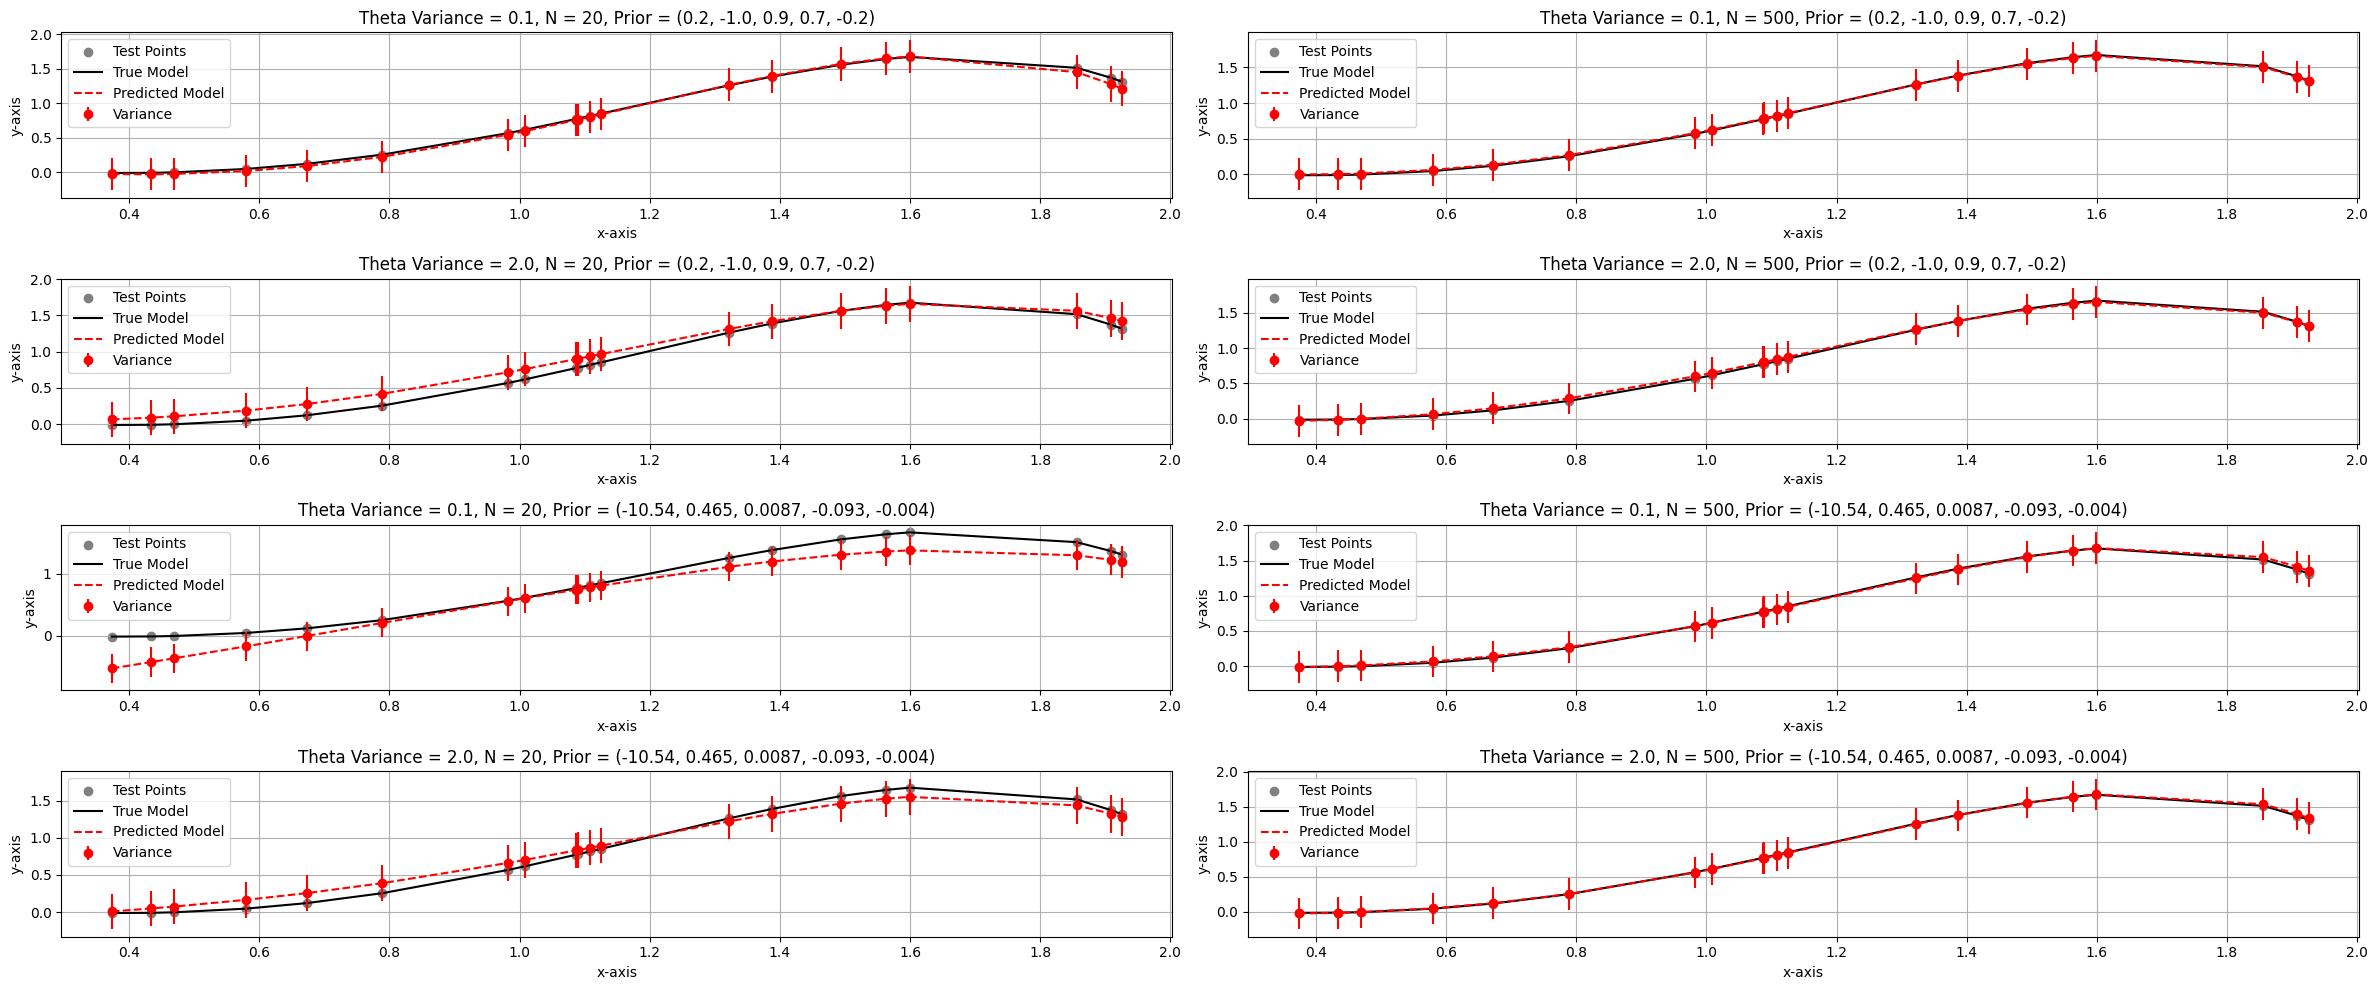

In [ ]:
# plot the results
plt.figure(figsize=(24, 10))
plot_idx = 1  # subplot index

# loop over the combinations in results dictionary
for (theta_mean, theta_variance, N), (mu_y_all, var_y_all) in results.items():

  mu_y = mu_y_all
  var_y = var_y_all

  # make a subplot for each combination of results
  plt.subplot(4, 2, plot_idx)
  plt.scatter(x_test_4, y_test_4, color='grey', label='Test Points')
  plt.plot(x_test_4, y_test_4, 'black', label="True Model")
  plt.plot(x_test_4, mu_y.squeeze(), 'r--', label="Predicted Model") # squeeze from (20,1) to (20,)!
  plt.errorbar(x_test_4, mu_y.squeeze(), yerr=np.sqrt(var_y), fmt='o', color='red', label="Variance")
  plt.title(f"Theta Variance = {theta_variance}, N = {N}, Prior = {theta_mean}")
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.legend()
  plt.grid(True)

  plot_idx += 1

plt.tight_layout()
plt.show()

The plots show that increasing training size improves prediction accuracy. Lower prior variance in conjunction with small $N$ results in worse predictions, while prior of $equation 2$ leads to better alignment with the true model, especially when $N = 500$. Another time we mention how important is the large training size, because even if we have a bad prior and high variance of it, the model can still achieve good predictions and low uncertainty due to the influence of the data, which dominates the prior as training size increases.

### Experiment 7.5. Train the true model with EM algorithm over $M$ iterations for different values of $N$.

Training set N: 20
Estimated noise variance: 0.0420
Estimated prior variance: 0.6139
MSE: 0.0037
Expectation Value: 0.003744665522024967

Training set N: 500
Estimated noise variance: 0.0410
Estimated prior variance: 0.6059
MSE: 0.0004
Expectation Value: 0.0003645402660719357



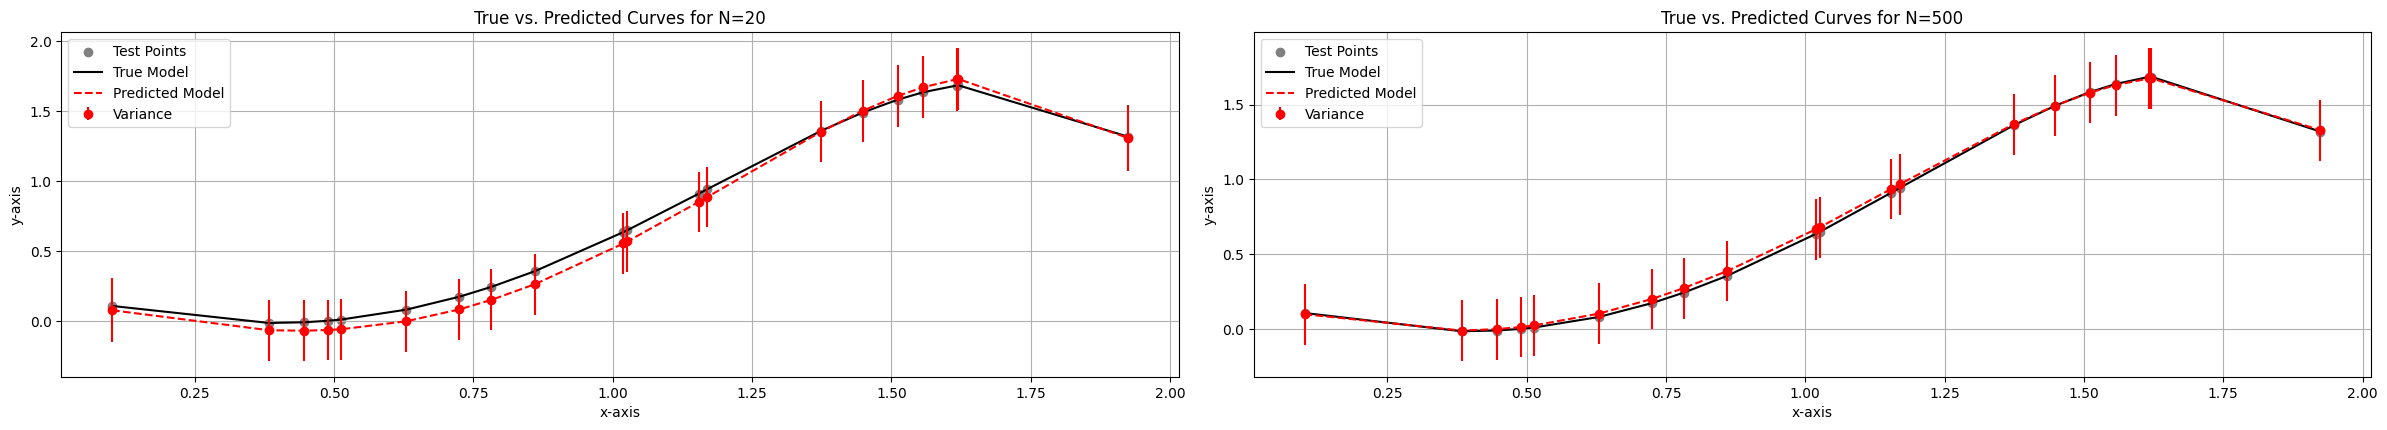

In [4]:
# new parameters
epsilon = 1e-6  # convergence tolerance
plot_idx = 1 # plot index

# generate test set
x_test = np.sort(np.random.uniform(0, 2, N1))
y_test = f_true(x_test, theta_true)  # true model
phi_test = np.array([np.ones(N1), x_test, x_test**2, x_test**3, x_test**5]).T # true model

# large figure for plots
plt.figure(figsize=(24, 8))

for N in training_sizes:
  # generate training set
  x_train = np.linspace(0, 2, N) # again in the same space
  y_train_7_5 = f_true(x_train, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N) # true model
  Phi = np.array([np.ones(N), x_train, x_train**2, x_train**3, x_train**5]).T

  # initialize EM variables
  alpha = 1.0
  beta = 1.0
  alphas = []
  betas = []
  mse_history = []

  predicted_means = []  # track convergence of predicted means
  iterations = 0 # iters for EM algo updates for the current N (difficult to rreach 1000)

  # EM Algorithm over M iters (it will be less until the time there's convergence)
  for iteration in range(M):
    # 1. Expectation step
    Sigma = np.linalg.inv(alpha * np.eye(Phi.shape[1]) + beta * Phi.T @ Phi)
    mu = beta * Sigma @ Phi.T @ y_train_7_5

    # 2. Maximization step
    A = np.linalg.norm(mu)**2 + np.trace(Sigma)
    B = np.linalg.norm(y_train_7_5 - Phi @ mu)**2 + np.trace(Phi @ Sigma @ Phi.T)

    new_alpha = Phi.shape[1] / A
    new_beta = N / B

    # store values for plotting
    alphas.append(new_alpha)
    betas.append(new_beta)

    # Check for convergence
    if np.abs(new_alpha - alpha) < epsilon and np.abs(new_beta - beta) < epsilon:
      break

    # 3. Update parameters
    alpha = new_alpha
    beta = new_beta

    iterations += 1 # track iterations

    # mse for the current iteration
    y_preds_iter = phi_test @ mu
    mse_iter = np.mean((y_test - y_preds_iter)**2)
    mse_history.append(mse_iter)
    # iters info
    #print(f"Iteration {iteration + 1}: alpha={alpha:.4f}, beta={beta:.4f}, MSE={mse_iter:.4f}")

  # and for the current N:

  # 1. update noise and prior variances with optimal new a, b
  noise_variance = 1 / beta
  theta_variance = 1 / alpha

  # 2. with the new best estimates, find mu_y, var_y on test set(FBI predictions)
  y_pred = phi_test @ mu
  inv_term = np.linalg.inv(noise_variance * np.eye(5) + theta_variance * Phi.T @ Phi)
  var_y = noise_variance + noise_variance * theta_variance * np.diag(phi_test @ inv_term @ phi_test.T)

  # 3. # calculate MSE on the test set
  mse = np.mean((y_test - y_pred)**2)
  exp_value = mse

  # 4. print the results
  print(f"Training set N: {N}")
  print(f"Estimated noise variance: {noise_variance:.4f}")
  print(f"Estimated prior variance: {theta_variance:.4f}")
  print(f"MSE: {mse:.4f}")
  #print(f"Iterations: {iterations}")
  print(f"Expectation Value: {exp_value:}\n")

  # 5. plot true vs. predicted curves

  plt.subplot(2, len(training_sizes), plot_idx)
  plt.scatter(x_test, y_test, color='grey', label='Test Points')
  plt.plot(x_test, y_test, color='black', label="True Model")
  plt.plot(x_test, y_pred, 'r--', label="Predicted Model")
  plt.errorbar(x_test, y_pred, yerr=np.sqrt(var_y), fmt='o', color='red', label="Variance")
  plt.title(f"True vs. Predicted Curves for N={N}")
  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.legend()
  plt.grid(True)

  # 6. plot mse vs. iterations
  # plt.subplot(2, len(training_sizes), plot_idx + len(training_sizes))
  # plt.plot(range(1, len(mse_history) + 1), mse_history, color='red', label='MSE')
  # plt.plot(range(1, len(alphas) + 1), alphas, color='grey', label='Alpha')
  # plt.plot(range(1, len(betas) + 1), betas, color='black', label='Beta')
  # plt.title(f"Alpha, Beta and MSE Convergence for N={N}")
  # plt.xlabel("Iterations")
  # plt.ylabel("Y-axis")
  # plt.legend()
  # plt.grid(True)
  plot_idx += 1 # go to the next plot

plt.tight_layout()
plt.show()

As $N$ increases, predicted curve becomes one with the true curve, as expected and as it is obvious from the MSE values as well. Observing the arithmetice results, we can see how estimated prior and noise variances fluctuate in ragrd to $N$ and MSE. We also observe that while increasing $N$ the estimated noise variance decreases, reaching its initial value. To sum up, EM algorithm can give as an optimized estimation of both noise and prior variances with great predictions at the end.

### Experiment 7.6. Train for $M$ with different values of $h$ and $N$ with Parzen Window method.

We simply try different $h$ and $N$ for $M$ iterations.

N = 20, h = 0.0300, Expectation Value = 0.0462
N = 20, h = 0.0600, Expectation Value = 0.0332
N = 20, h = 0.1000, Expectation Value = 0.0268
N = 20, h = 0.6000, Expectation Value = 0.1269
N = 500, h = 0.0300, Expectation Value = 0.0021
N = 500, h = 0.0600, Expectation Value = 0.0017
N = 500, h = 0.1000, Expectation Value = 0.0028
N = 500, h = 0.6000, Expectation Value = 0.1039


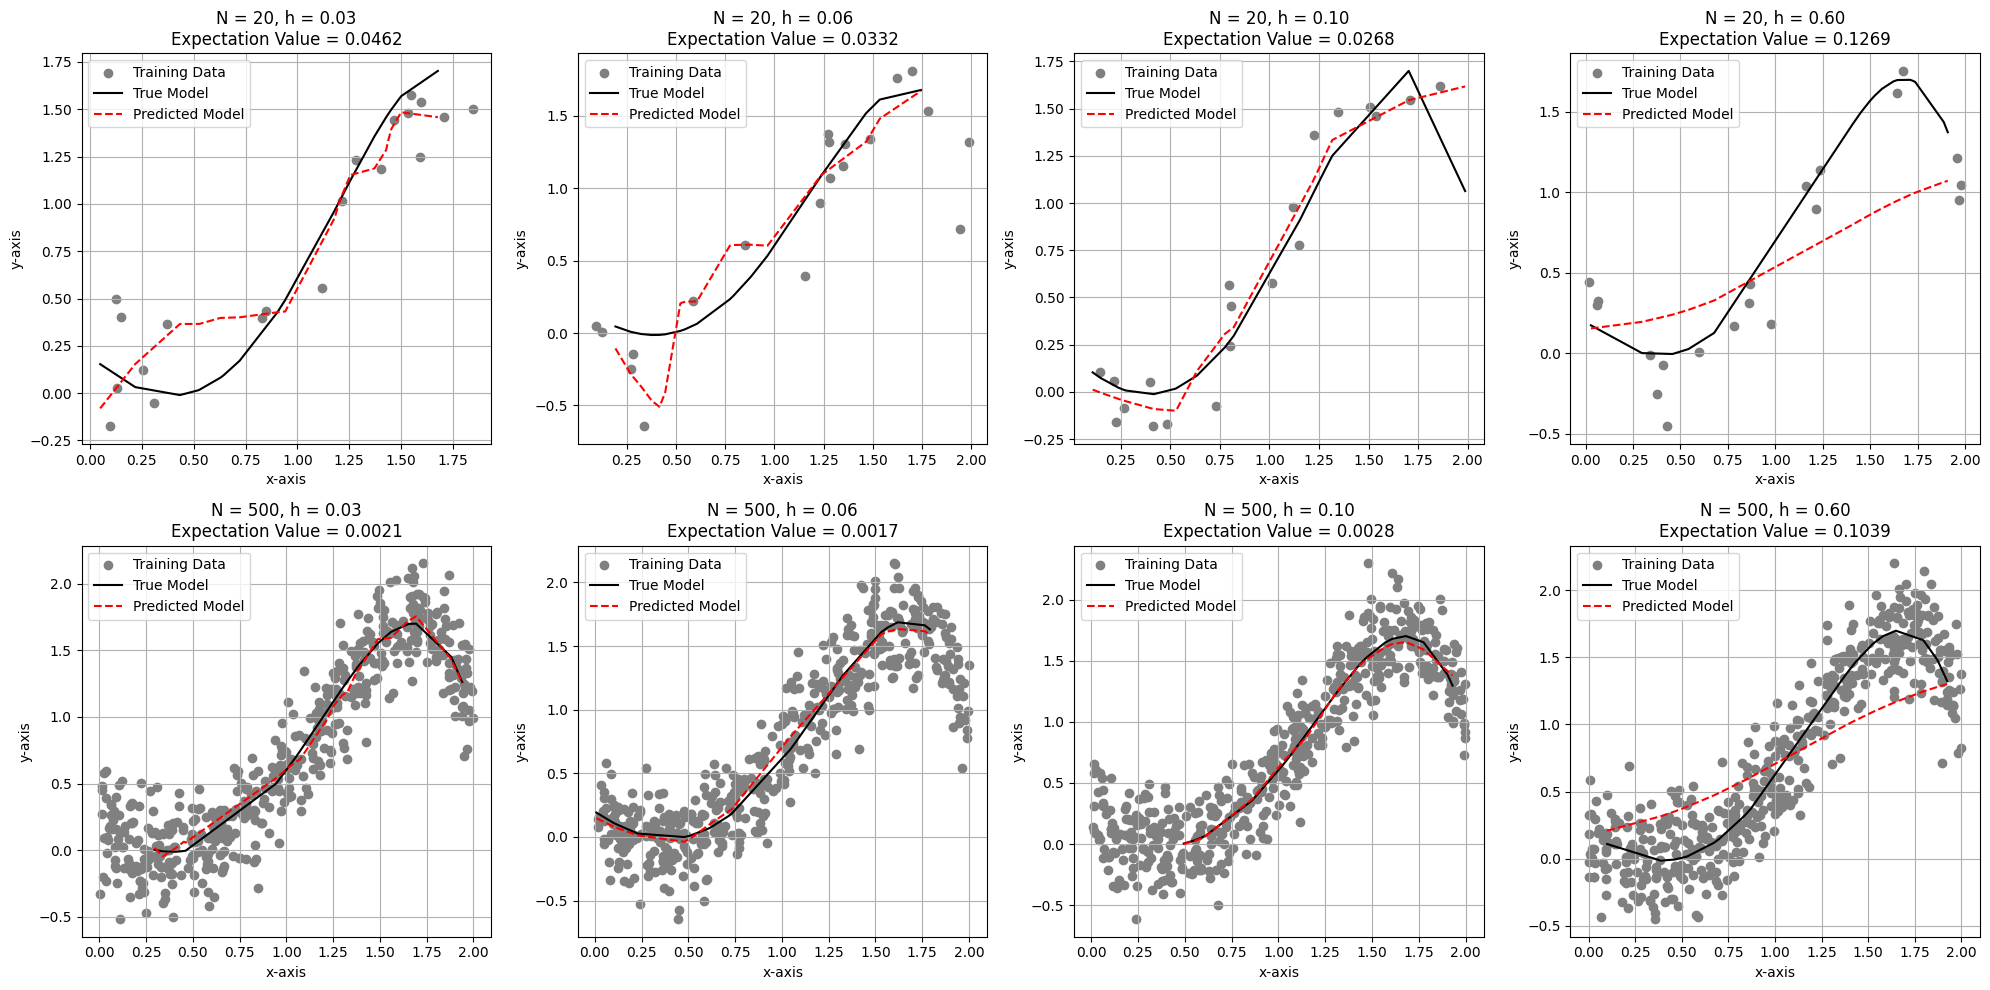

In [ ]:
# parameters
exp_values_6_2 = [] # storage list for predictions
preds = {} # storage dictionary for predictions

# create a figure and axes
num_plots = len(training_sizes) * len(h_sizes)  # calculate the total number of plots
rows = 2
cols = 4 # 4 plots per row
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # flatten the axes for easy indexing
plot_index = 0 # index for subplots

# loop over N and h
for N in training_sizes:
  for h in h_sizes:
    # storing list for mses for each iteration
    mses = []

    # loop over M
    for i in range(M):
      # generate training data
      x_train_6_2 = np.random.uniform(0, 2, N)
      y_train_6_2 = f_true(x_train_6_2, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N)

      # generate test data
      x_test_6_2 = np.sort(np.random.uniform(0, 2, N1))
      y_test_6_2 = f_true(x_test_6_2, theta_true)

      # predictions
      y_pred_6_2 = g(x_train_6_2, y_train_6_2, x_test_6_2, h)

      # calculate and store mses for the curret iteration
      mses.append(mse(y_test_6_2, y_pred_6_2))

    # calculate and store expectation value over M iters(avg mse over M) for the current combination
    exp_val_6_2 = np.mean(mses)
    exp_values_6_2.append(exp_val_6_2)

    # store y_pred for the current combination
    preds[(N, h)] = y_pred

    # print results
    print(f"N = {N}, h = {h:.4f}, Expectation Value = {exp_val_6_2:.4f}")

    # Plot results
    ax = axes[plot_index]
    ax.scatter(x_train_6_2, y_train_6_2, color="grey", label="Training Data")
    ax.plot(x_test_6_2, y_test_6_2, color='black', label="True Model")
    ax.plot(x_test_6_2, y_pred_6_2, 'r--', label="Predicted Model")
    ax.set_title(f"N = {N}, h = {h:.2f}\nExpectation Value = {exp_val_6_2:.4f}")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.legend()
    ax.grid(True)
    plot_index += 1

plt.tight_layout()
plt.show()

For this case, we would like to present the results of aplying this method of estimation based on another ground function($sin$) to generate data in order to highlight and comment on the above results.

N = 20, h = 0.0300, Expectation Value = nan
N = 20, h = 0.0600, Expectation Value = 0.3832
N = 20, h = 0.1000, Expectation Value = 0.3747
N = 20, h = 0.6000, Expectation Value = 0.5663
N = 500, h = 0.0300, Expectation Value = 0.0065
N = 500, h = 0.0600, Expectation Value = 0.0075
N = 500, h = 0.1000, Expectation Value = 0.0225
N = 500, h = 0.6000, Expectation Value = 0.4813


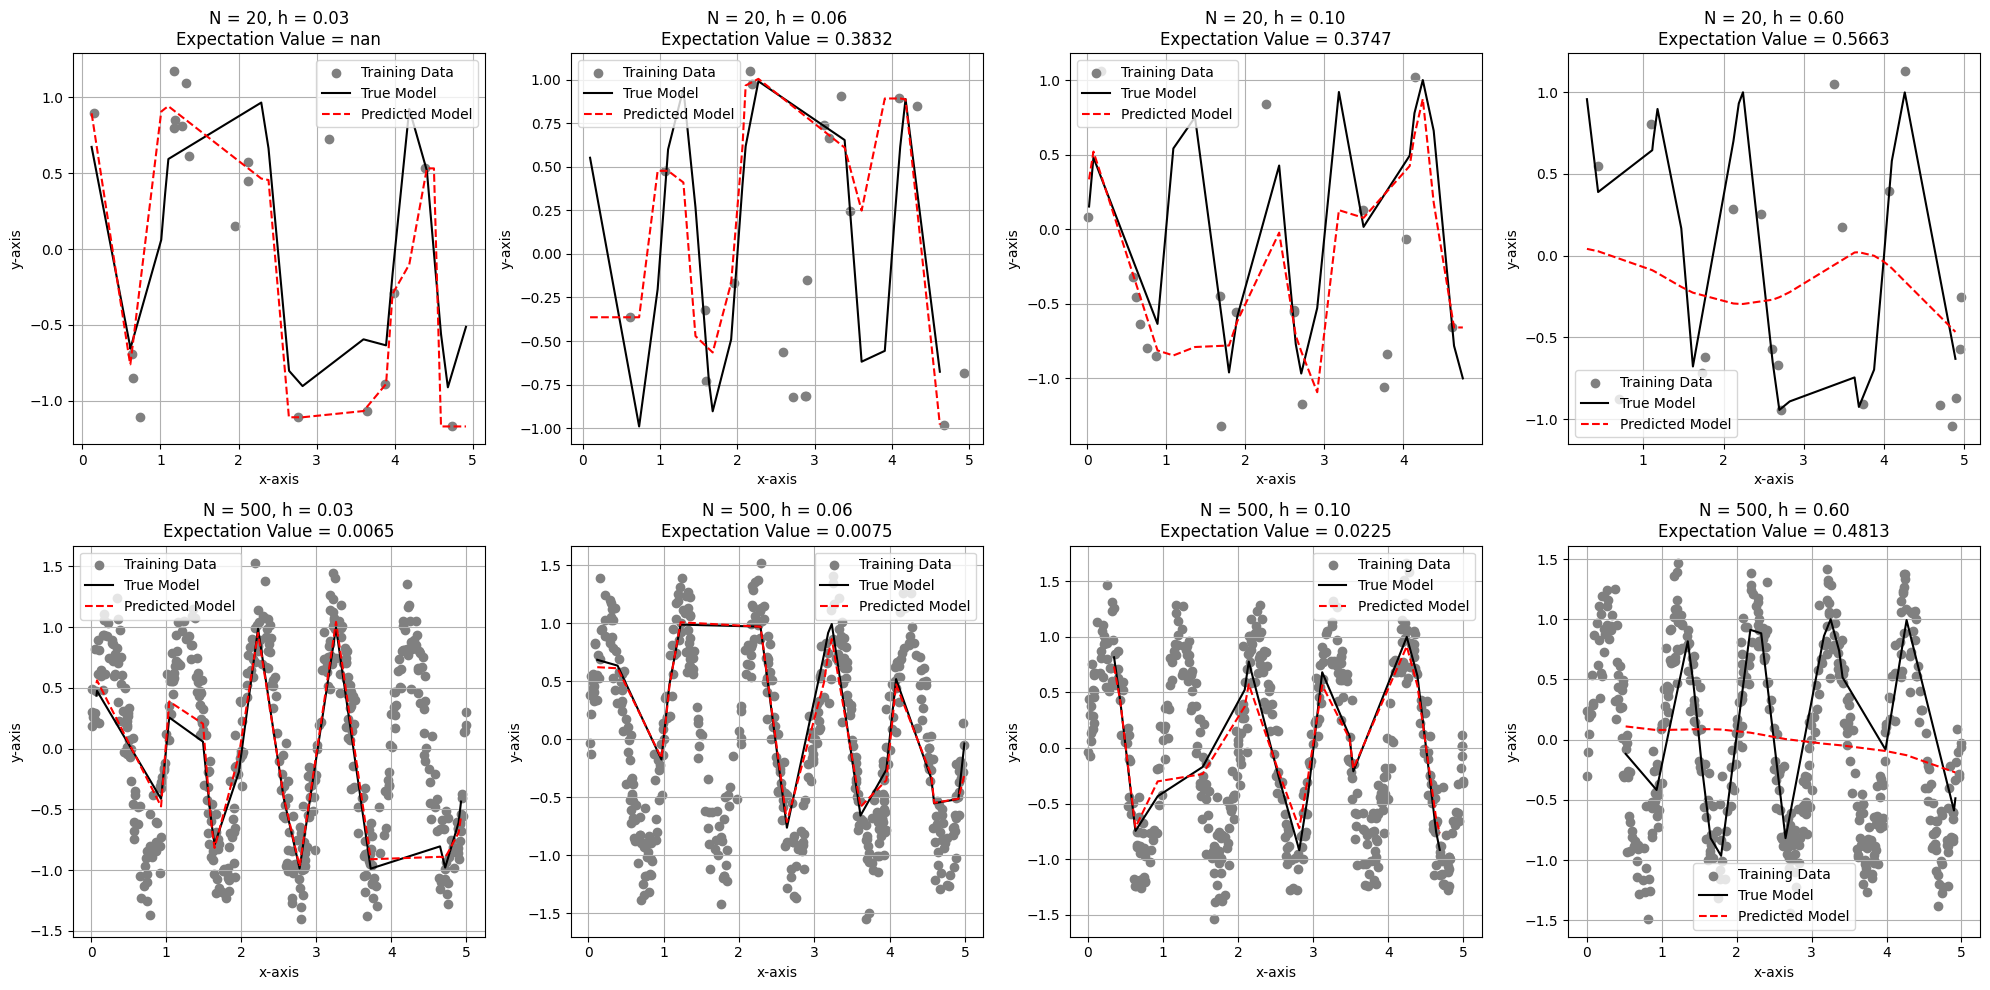

In [ ]:
# parameters
exp_values_6_2 = [] # storage list for predictions
preds = {} # storage dictionary for predictions

# sin ground function
def f2(x, theta):
  return np.sin(2 * np.pi * x)

# create a figure and axes
num_plots = len(training_sizes) * len(h_sizes)  # calculate the total number of plots
rows = 2
cols = 4 # 4 plots per row
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  # flatten the axes for easy indexing
plot_index = 0 # index for subplots

# loop over N and h
for N in training_sizes:
  for h in h_sizes:
    # storing list for mses for each iteration
    mses = []

    # loop over M
    for i in range(M):
      # generate training data
      x_train_6_2 = np.random.uniform(0, 5, N) # in (0, 5) now
      y_train_6_2 = f2(x_train_6_2, theta_true) + np.random.normal(noise_mean, np.sqrt(noise_variance), N)

      # generate test data
      x_test_6_2 = np.sort(np.random.uniform(0, 5, N1))
      y_test_6_2 = f2(x_test_6_2, theta_true)

      # predictions
      y_pred_6_2 = g(x_train_6_2, y_train_6_2, x_test_6_2, h)

      # calculate and store mses for the curret iteration
      mses.append(mse(y_test_6_2, y_pred_6_2))

    # calculate and store expectation value over M iters(avg mse over M) for the current combination
    exp_val_6_2 = np.mean(mses)
    exp_values_6_2.append(exp_val_6_2)

    # store y_pred for the current combination
    preds[(N, h)] = y_pred

    # print results
    print(f"N = {N}, h = {h:.4f}, Expectation Value = {exp_val_6_2:.4f}")

    # Plot results
    ax = axes[plot_index]
    ax.scatter(x_train_6_2, y_train_6_2, color="grey", label="Training Data")
    ax.plot(x_test_6_2, y_test_6_2, color='black', label="True Model")
    ax.plot(x_test_6_2, y_pred_6_2, 'r--', label="Predicted Model")
    ax.set_title(f"N = {N}, h = {h:.2f}\nExpectation Value = {exp_val_6_2:.4f}")
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.legend()
    ax.grid(True)
    plot_index += 1

plt.tight_layout()
plt.show()

In both cases, we observe that for small training size($N = 20$), the predictions are not so accurate than in larger training set($N = 500$) and that is why we get higher expectation values, generally. Regarding the length of bins, $h$, we see that for small values(0.03, 0.04), prediction lines are narrow and the model overfits in both cases of $N$. The difference here is that for small $N$ and $h$, the model is not such good as when we have large $N$ and small $h$(which gives us almost the best results). Better prediction lines, we get for $h$ (0.06, 0.1) for both cases of $N$(of course for larger $N$ better results)and this is also obvious from expectation values which are in low levels for these points for both $N$. When $h$ takes values from 0.6 and above(we also tried for 1 and 2), prediction lines become flat and very smooth, unable to catch the data patterns(underfitting) in both cases, so we see expectation values at their highest. So, there is a trade-off between $N$ and $h$ where when we have small $N$, moderate $h$ work better, but when we have high $N$, the model becomes more robust to $h$, allowing even small $h$ to perform well.

Another note is that, for very small $h$, we get a numerical issue. If we have many small bins, they will probably empty, especially for small number of training points(20), so the calculation of sum of weights(weights is a exp term and low value in dinominator of exp term=>exp to zero) becomes zero and, therefore, the calculation of predictions is unable.  

### 7.7. Table Results.

The results for all the experiments in this section are summarized in the below tables. For a training set $N = 20$ and a test set also $N1 = 20$:

| Experiment # | Method           | Functional form of the regression model      | N  | σ²   | Prior for θ₀        | σ²   | h                     | Expectation Value (E*) |
|--------------|------------------|----------------------------------------------|-----|-------|----------------------|-------|-----------------------|------------------------|
| 1            | LS               | True model (without 4th power) | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0111         |
| 2            | LS               | True model (full 5th degree)                  | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0125         |
| 3            | LS               | 2nd degree polynomial                       | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0731         |
| 4            | LS               | 10th degree polynomial                      | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0855         |
| 5            | FBI              | True model                                  | 20  | 0.05  | True eq. (2)         | 0.1   | -                     | 0.0068         |
| 6            | FBI              | True model                                  | 20  | 0.05  | False (θ₀F)          | 0.1   | -                     | 0.0451         |
| 7            | FBI              | True model                                  | 20  | 0.05  | True eq. (2)         | 2.0   | -                     | 0.0072         |
| 8            | FBI              | True model                                  | 20  | 0.05  | False (θ₀F)          | 2.0   | -                     | 0.0081         |
| 9            | EM               | True model                                  | 20  | -     | -                    | -     | -                     | 0.0037         |
| 10           | Parzen windows   | Sum of Gaussians                            | 20  | -     | -                    | -     | 0.1        | 0.0268        |


And for a training set $N = 500$ and a test set $N1 = 20$:

| Experiment # | Method           | Functional form of the regression model      | N  | σ²   | Prior for θ₀        | σ²   | h                     | Expectation Value (E*) |
|--------------|------------------|----------------------------------------------|-----|-------|----------------------|-------|-----------------------|------------------------|
| 1            | LS               | True model (without 4th power) | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0005         |
| 2            | LS               | True model (full 5th degree)                  | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0006         |
| 3            | LS               | 2nd degree polynomial                       | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0728         |
| 4            | LS               | 10th degree polynomial                      | 20  | 0.05     | True eq. (2)                    | -     | -                     | 0.0709         |
| 5            | FBI              | True model                                  | 20  | 0.05  | True eq. (2)         | 0.1   | -                     | 0.00035         |
| 6            | FBI              | True model                                  | 20  | 0.05  | False (θ₀F)          | 0.1   | -                     | 0.0005         |
| 7            | FBI              | True model                                  | 20  | 0.05  | True eq. (2)         | 2.0   | -                     | 0.00039         |
| 8            | FBI              | True model                                  | 20  | 0.05  | False (θ₀F)          | 2.0   | -                     | 0.0004         |
| 9            | EM               | True model                                  | 20  | -     | -                    | -     | -                     | 0.00036         |
| 10           | Parzen windows   | Sum of Gaussians                            | 20  | -     | -                    | -     | 0.06        | 0.0017        |


For $N = 20$:

*  LS: the true model without the 4th power(less by one parameters to estimate) performs better than the full 5th-degree model(lower $E$). The simpler models of 2nd degree polynomial performs worse due to underfitting, while the 10th degree polynomial overfits with higher $E$.
*  FBI: models with the prior of $equation 2$ and smaller variance of $0.1$(higher confidence here) perform best. Errors increase when we have a poor prior along with high uncertainty of it(too optimistic!).
*  EM here achieved a low, but not the lowest error. It performs very well (despite having to estimate the prior from data), but is slightly outperformed by FBI with a correct and confident prior. This makes sense, as EM learns everything from the data, while FBI has an advantage when fed good priors.
*  Parzen windows showed a reasonable performance, depending on moderate values of $h$, but is outperformed by model-based methods.

Fof $N = 500$:

* in all cases, we have significant improvement!
* LS: both models with or without the 4th power term perform similarly, showing that more data can reduce the influence of missing terms, allowing the data to dominate and guide the predictions effectively. Polynomials of 2nd and 10th degree achieved less errors with very notably improved performance for the 2nd-degree case.
* FBI: we again get the best performance, for the good prior of $equation 2$, as we are very confident of it(probabaly we cheat ourselves here!), but all models benefit from larger $N$.
* EM continues to perform extremely well, indicating its strength and achieving competitive results very close to FBI with correct priors, as expected(because if all benefit from larger $N$, despite estimating all hyperparameters from data. While it no longer “wins” outright, its robustness and lack of reliance on prior knowledge make it highly effective, especially as $N$ increases.
* Parzen windows had the greatest improvement, benefiting more from the increased training data compared to any other case and highlighting the data-hungry nature of non-parametric methods!

Final general notations:

* Training size matters. More data improves all methods and reduces sensitivity to priors and variances.
* Least Squared (LS) method provides a great and effective way to estimate linearly non-linear models with respect to the parameter vector. We only need to construct $\Phi$ matrices.
* Model complexity matters. Simpler models underperform and, even for more data, they can't help us to the business, while more complex models(e.g. 10th degree polynomial) may suffer from overfitting, especially with smaller $N$.
* Bayesian Inference (FBI) uses prior knowledge, relying heavily on obseravations to refine prediction information. Good priors with high confidence can be extremely effective, while poor priors can lead to catastrophic outcomes unless we have very large dataset.
* EM performs well across different settings, offering a data-driven way to estimate both prior and noise parameters. It does not achieve the lowest error in all cases but delivers excellent and consistent performance without relying on prior assumptions.
* Parzen windows are highly sensitive to the kernel bandwidth $h$. With enough data and a well-chosen $h$, they perform reasonably well, but they are still generally outperformed by model-based approaches.
* There is always a trade-off between model complexity, data size, prior knowledge, and estimation methods. Careful experimentation is key to making the right choices.